# **Artificial Intelligence and Machine Learning Group Project: Trains Dataset**

## Project Goal
The main goal of our analysis, and subsequent model implementation, is to understand the customers' satisfaction (whether a customer is satisfied or not), in order to provide the marketing team with several marketing campaign tailored to different customers' needs. 
As a matter of fact, by accurately classifying customers based on their satisfaction, the company can tailor its marketing efforts more effectively. For example:
- **Satisfied customers** can be targeted with loyalty programs or upselling opportunities.
- **Unsatisfied customers** can be approached with remedial measures, discounts, or personalized offers to improve their satisfaction and retain them.

## **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations. We will know understand the steps of this process:

1. **Understand Column Meanings:** The first focus is on the available data that gives a lot of information. Begin by comprehending the meaning of each column and what each attribute represents and its significance in the analysis. This provides context for your data, which helps to understand and get valuable insights from them. 

2. **Check Data Integrity:** Ensure the integrity of your trains_df by inspecting for missing values (NaNs) and outliers. These are to be removed so that data contains only those values that are relevant and important from the target point of view. This will not only reduce time but also reduces the computational power from an estimation point of view. Addressing data quality issues is crucial to reliable analysis.

3. **Visualize Distributions & Pair Plots for Relationships:** Finding a correlation between variables helps to know how a particular variable is related to another. Utilize data visualization techniques to explore the distribution of individual variables. Tools like histograms, kernel density plots, and box plots can reveal insights into the data's spread and central tendencies.Statistical formulae applied for numerical outputs give fair information, but graphical visuals are more appealing and easier to interpret. Moreover, creating pair plots to visualize relationships between pairs of variables. This matrix of scatter plots helps identify correlations and patterns, aiding in understanding the data's structure.

### Step 1: Understand the column meaning
We start by importing the proper libraries and load the trains_trains_trains_df

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler



import os
import requests

In [151]:
# saving the file containing the dataset into a pandas dataframe
initial_trains_df= pd.read_csv("trains.csv", sep=',')

In [152]:
# getting an overview of the raw data
initial_trains_df.head()

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,...,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Date and Time,Distance,Seat Comfort Rating,Work or Leisure,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
0,3,5,5,13,4,3,4718594,4,1,4,...,3,N,5,2016-02-19 10:53,460,5,leisure,25,4,5
1,5,4,1,25,2,3,1048580,1,3,3,...,3,N,1,2016-02-26 15:39,235,1,work,1,1,1
2,3,4,5,26,2,2,3670024,4,2,4,...,2,Y,5,2016-02-26 07:26,1142,5,work,0,4,5
3,5,4,2,25,5,2,3145737,1,5,3,...,5,N,2,2016-02-27 08:32,562,2,work,11,2,2
4,4,3,4,61,3,3,5767177,3,3,4,...,3,Y,3,2016-02-27 14:37,214,5,work,0,3,3


In [153]:
# identifying the categorical and numerical variables
cat_cols= initial_trains_df.select_dtypes(include=['object']).columns
num_cols = initial_trains_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Ticket Class', 'Loyalty', 'Gender', 'Satisfied', 'Date and Time',
       'Work or Leisure'],
      dtype='object')
Numerical Variables:
['Legroom Service Rating', 'Onboard General Rating', "Food'n'Drink Rating", 'Age', 'Departure Arrival Time Rating', 'Onboard WiFi Rating', 'Ticket ID', 'Checkin Rating', 'Track Location Rating', 'Baggage Handling Rating', 'Arrival Delay in Minutes', 'Boarding Rating', 'Online Booking Rating', 'Onboard Entertainment Rating', 'Distance', 'Seat Comfort Rating', 'Departure Delay in Minutes', 'Onboard Service Rating', 'Cleanliness Rating']


### *Dataset Features*
In the Trains trains_trains_df, each column represents a different feature of the train itself or related to the passengers. Let's get a deeper understanding of each feature: 

• **Satisfied**: whether the customer is satisfied, this is a binary variable, it can be either Yes or No;

• **Onboard General Rating**: rating from 0 to 5 about the service on board, therefore is a numerical variable; 

• **Work or Leisure**: was the travelling for work or leisure, it is a categorical variable and the possible outcomes are 'Work' or 'Leisure';

• **Baggage Handling Rating**: rating from 0 to 5 about the handling of the baggage, therefore is a numerical variable;

• **Age**: the age of the customer, therefore is a numerical variable, that can assume any number according to the age of that person; 

• **Cleanliness Rating**: rating from 0 to 5 about the cleanliness of the train, therefore is a numerical variable; 

• **Ticket Class**: the class of the ticket, divided in 3 categories: Smart, Economic and Premium Class; it's a categorical variable;

• **Loyalty**: if the customer is part of a loyalty programor not, it is a binary variable, it can be Yes or No;

• **Food'n'Drink Rating**: rating from 0 to 5 about the food and bevarages on board, therefore is a numerical variable; 

• **Gender**: whether male or female, it is a categorical variable denoted by M or F;

• **Online Booking Rating**: rating from 0 to 5 about the online booking experience, therefore is a numerical variable; 

• **Ticket ID**: unique ID assigned to the travel ticket, therefore is a numerical variable, it can be any number of 7 figures; 

• **Onboard Service Rating**: rating from 0 to 5 about the service onboard, therefore is a numerical variable; 

• **Legroom Service Rating**: rating from 0 to 5 about the space for the legs, therefore is a numerical variable; 

• **Arrival Delay in Minutes**: the delay on the arrival of the train, therefore is a numerical variable;

• **Departure Delay in Minutes**: the delay on the departure of the train, therefore is a numerical variable, it can assume any number; 

• **Checkin Rating**: rating from 0 to 5 about the checkin experience, therefore is a numerical variable; 

• **Onboard Entertainment Rating**: rating from 0 to 5 about the onboard entertainment experience, therefore is a numerical variable; 

• **Distance**: the distance of the specific travel, therefore is a numerical variable, it can assume any number;  

• **Boarding Rating**: rating from 0 to 5 about the boarding, therefore is a numerical variable; 

• **Onboard WiFi Rating**: rating from 0 to 5 about the WiFi service, therefore is a numerical variable; 

• **Date and Time**: the date and time of the travel, the date is presented as yyyy-mm-dd while the time as hh:mm;

• **Seat Comfort Rating**: rating from 0 to 5 about the comfort of the seating, therefore is a numerical variable; 

• **Track Location Rating**: rating from 0 to 5 about the track where the train has been boarded, therefore is a numerical variable; 

• **Departure Arrival Time Rating**: rating from 0 to 5 about the timing of the travel, therefore is a numerical variable; 

### Step 2: Check Data Integrity
Here we proceed with the EDA by checking the data integrity of the trains_trains_df, with particular attention to missing values. 

In [154]:
# checking for the presence of missing values
display(initial_trains_df.isnull().any())

Legroom Service Rating           False
Onboard General Rating           False
Food'n'Drink Rating              False
Age                              False
Departure Arrival Time Rating    False
Onboard WiFi Rating              False
Ticket ID                        False
Checkin Rating                   False
Track Location Rating            False
Baggage Handling Rating          False
Arrival Delay in Minutes          True
Ticket Class                     False
Loyalty                          False
Gender                           False
Boarding Rating                  False
Online Booking Rating            False
Satisfied                        False
Onboard Entertainment Rating     False
Date and Time                    False
Distance                         False
Seat Comfort Rating              False
Work or Leisure                  False
Departure Delay in Minutes       False
Onboard Service Rating           False
Cleanliness Rating               False
dtype: bool

In [155]:
# Display the count of missing values for each column
missing_values = initial_trains_df.isnull().sum()

print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
Legroom Service Rating             0
Onboard General Rating             0
Food'n'Drink Rating                0
Age                                0
Departure Arrival Time Rating      0
Onboard WiFi Rating                0
Ticket ID                          0
Checkin Rating                     0
Track Location Rating              0
Baggage Handling Rating            0
Arrival Delay in Minutes         393
Ticket Class                       0
Loyalty                            0
Gender                             0
Boarding Rating                    0
Online Booking Rating              0
Satisfied                          0
Onboard Entertainment Rating       0
Date and Time                      0
Distance                           0
Seat Comfort Rating                0
Work or Leisure                    0
Departure Delay in Minutes         0
Onboard Service Rating             0
Cleanliness Rating                 0
dtype: int64


As showned by the code, the only feature containing missing values is the 'Arrrival Delay in Minutes'. Since addressing missing data is crucial for ensuring the accuracy and reliability of insights drawn from a trains_df, understanding the nature of these missing values is essential. 
We decided to address this problem by exploiting the Python library **Missingno**, valuable tool for visualizing and analyzing missing data within our trains_dfs. In particular, we used the **Matrix Plot**, which provides a visual representation of missing values in the trains_df, allowing us to identify patterns and areas with high or low missingness; columns with excessive missing values may need to be removed or imputed.

In [156]:
import missingno as msno

<Axes: >

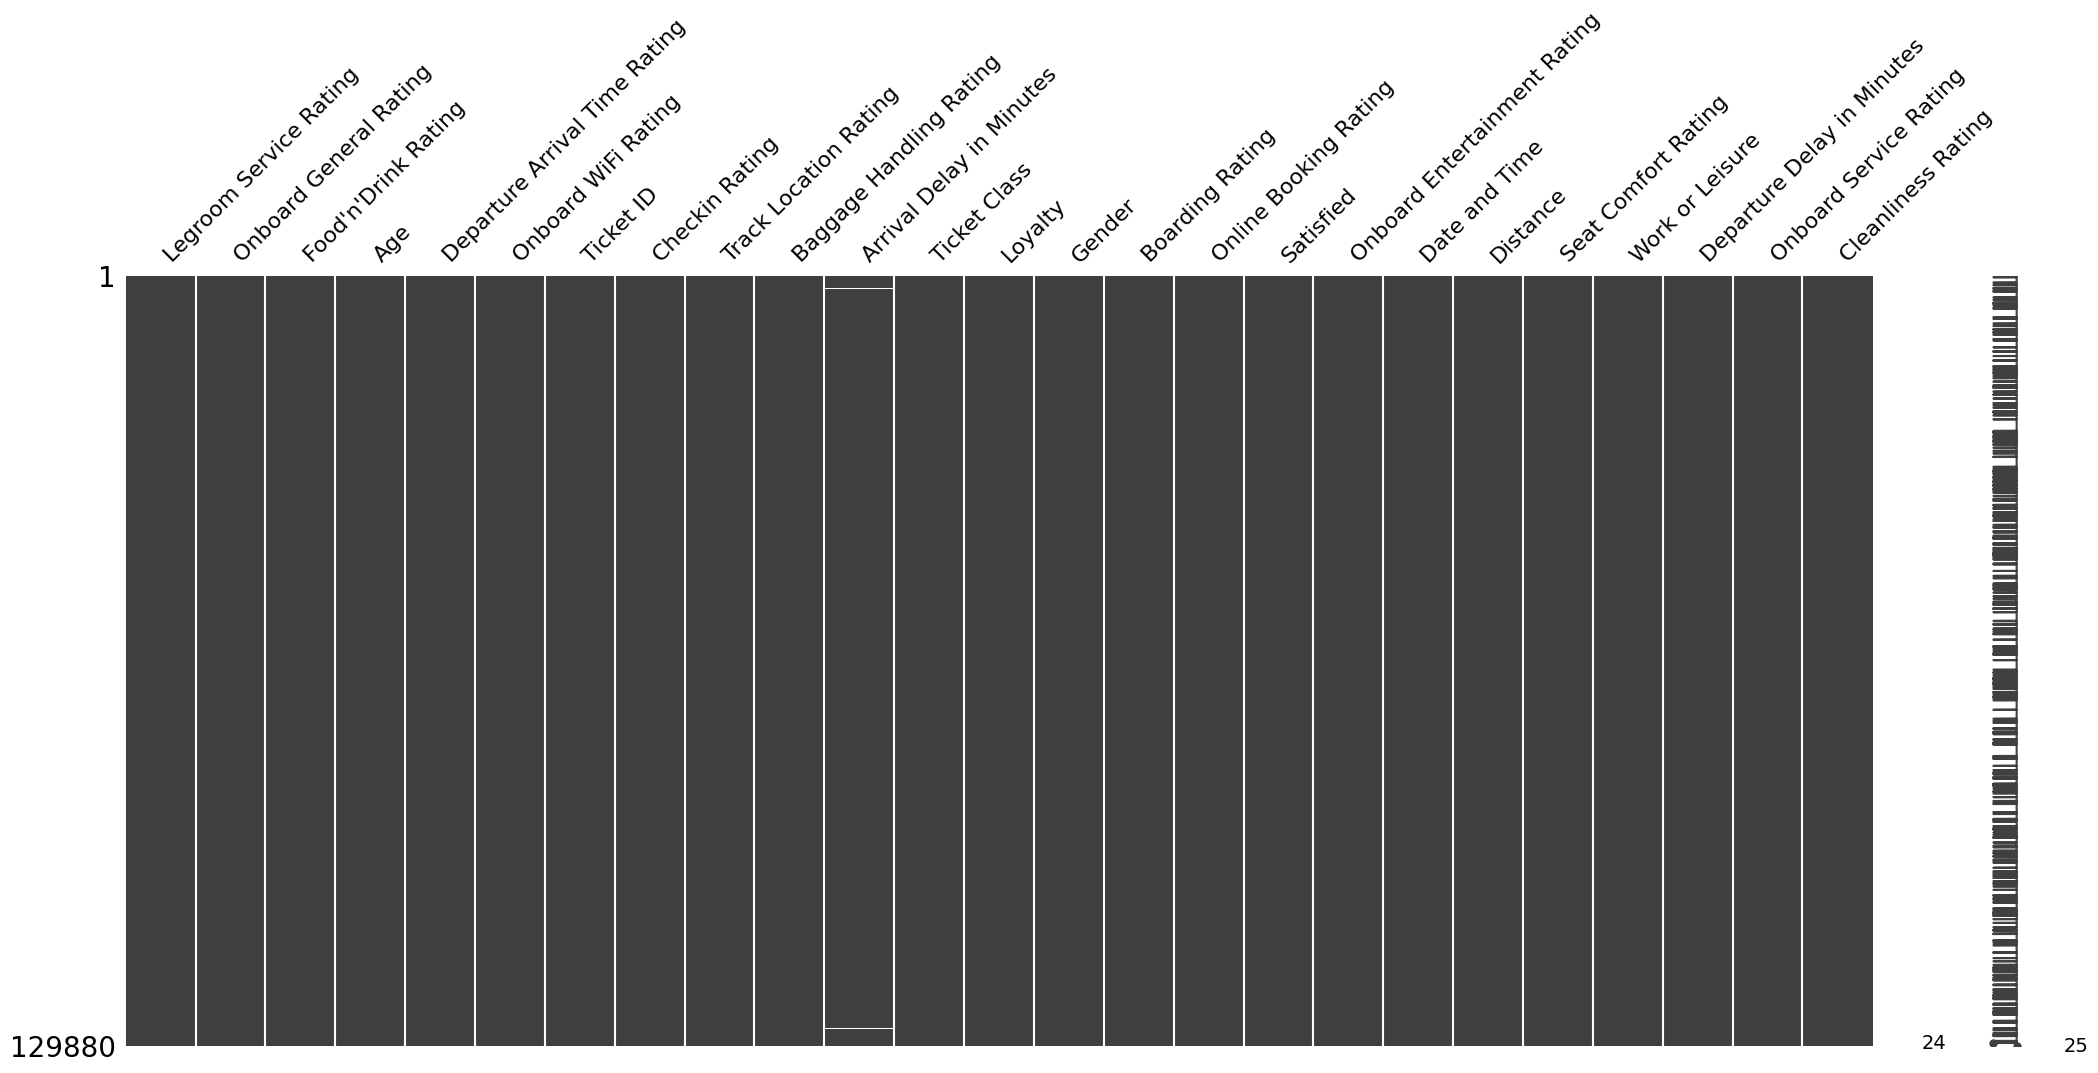

In [157]:
# matrix plot with missingno
msno.matrix(initial_trains_df)

The matrix shows us that the magnitude of the missing values of the 'Arrival Delay in Minutes' is negligible since there are only 396 missing values out of 129880. In order to highlight this consideration we proceed to further compute the percentage of the missing values. 

In [158]:
# Creating a DataFrame for missing values count and percentage
missing_value_df = pd.DataFrame({
    'Missing Values': initial_trains_df.isnull().sum(),
    'Percentage of Total (%)': (initial_trains_df.isnull().sum() / len(initial_trains_df)) * 100
})

# Filter out columns that don't have any missing values 
missing_value_df = missing_value_df[missing_value_df['Missing Values'] > 0]

missing_value_df



,Missing Values,Percentage of Total (%)
Arrival Delay in Minutes,393,0.302587


Again we proved the negligible nature of these missing values; taking into account our previous consideration, we decided to proceed by dropping the rows corresponding to the missing values of 'Arrival Delay in Minutes', due to the marginal importance of the missing values considering the whole trains_df.

In [159]:
#Drop rows with missing 'Arrival Delay in Minutes' values
trains_df = initial_trains_df.dropna(subset=['Arrival Delay in Minutes'])

# Calculate the number of rows dropped
rows_dropped = len(initial_trains_df) - len(trains_df)

# Print the number of rows dropped
print(f"Number of Rows Dropped: {rows_dropped}")


# Check if there are any NaN values in the dataset
if trains_df.isnull().any().any():
    print("The dataset contains NaN values")
else:
    print("The dataset does not contain any NaN values")

# Get the count of NaN values in each column
nan_counts = trains_df.isnull().sum()

# Print the counts
print(nan_counts)

Number of Rows Dropped: 393
The dataset does not contain any NaN values
Legroom Service Rating           0
Onboard General Rating           0
Food'n'Drink Rating              0
Age                              0
Departure Arrival Time Rating    0
Onboard WiFi Rating              0
Ticket ID                        0
Checkin Rating                   0
Track Location Rating            0
Baggage Handling Rating          0
Arrival Delay in Minutes         0
Ticket Class                     0
Loyalty                          0
Gender                           0
Boarding Rating                  0
Online Booking Rating            0
Satisfied                        0
Onboard Entertainment Rating     0
Date and Time                    0
Distance                         0
Seat Comfort Rating              0
Work or Leisure                  0
Departure Delay in Minutes       0
Onboard Service Rating           0
Cleanliness Rating               0
dtype: int64


Finally we obtain a clean dataset, with no missing values.

### *Cleaning the Data*
For our analysis, we decided to drop the following two columns, 'Ticket ID' and 'Date and Time', since we do not consider them relevant for our analysis; as a matter of fact the 'Ticket ID' is a unique ID assigned to the travel ticket not providing any additional information about our customers, while the 'Date and Time' is a variable containing the date and time of the travel that again doesn't provide any information about the satisfaction rate (different from the Departure Arrival Time Rating which instead rates the punctuality of the services provided by the company).

In [160]:
# drop Ticket ID column
trains_df = trains_df.drop(['Ticket ID'], axis=1)
# drop Date and Time column
trains_df = trains_df.drop(['Date and Time'], axis=1)

# get the shape of trains_df
print(trains_df.shape)

(129487, 23)


In [161]:
#recalculate the categorical variables without the dropped columns
cat_cols= trains_df.select_dtypes(include=['object']).columns
num_cols = trains_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Ticket Class', 'Loyalty', 'Gender', 'Satisfied', 'Work or Leisure'], dtype='object')
Numerical Variables:
['Legroom Service Rating', 'Onboard General Rating', "Food'n'Drink Rating", 'Age', 'Departure Arrival Time Rating', 'Onboard WiFi Rating', 'Checkin Rating', 'Track Location Rating', 'Baggage Handling Rating', 'Arrival Delay in Minutes', 'Boarding Rating', 'Online Booking Rating', 'Onboard Entertainment Rating', 'Distance', 'Seat Comfort Rating', 'Departure Delay in Minutes', 'Onboard Service Rating', 'Cleanliness Rating']


In [162]:
# here we print an indepth description of the numerical variables in our dataset: the number of instances in each variable, the mean,
# standard deviation, minimum and maximum values, and the 25th, 50th and 75th percentiles
trains_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Legroom Service Rating,129487.0,3.351078,1.316132,0.0,2.0,4.0,4.0,5.0
Onboard General Rating,129487.0,3.642373,1.176614,0.0,3.0,4.0,5.0,5.0
Food'n'Drink Rating,129487.0,3.204685,1.329905,0.0,2.0,3.0,4.0,5.0
Age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
Departure Arrival Time Rating,129487.0,3.057349,1.526787,0.0,2.0,3.0,4.0,5.0
Onboard WiFi Rating,129487.0,2.728544,1.329235,0.0,2.0,3.0,4.0,5.0
Checkin Rating,129487.0,3.306239,1.266146,0.0,3.0,3.0,4.0,5.0
Track Location Rating,129487.0,2.976909,1.278506,0.0,2.0,3.0,4.0,5.0
Baggage Handling Rating,129487.0,3.631886,1.180082,1.0,3.0,4.0,5.0,5.0
Arrival Delay in Minutes,129487.0,15.091129,38.465650,0.0,0.0,0.0,13.0,1584.0


### Step 3: Visualize distributions

### *Pairplots for Relationships*
Pairplots, also known as pairwise scatter plots or scatterplot matrices, are important in Exploratory Data Analysis (EDA) for several reasons:

1. **Visualization of Relationships**: Pairplots allow you to visualize the relationships between pairs of variables in your trains_df. By plotting each pair of variables against each other, you can quickly identify patterns, trends, and potential correlations. This visual inspection can reveal both linear and non-linear relationships between variables.

2. **Identifying Outliers**: Pairplots can help in identifying outliers or anomalies in the data. Outliers may appear as data points that fall far from the main cluster of points in the scatterplots. Identifying outliers is crucial because they can significantly impact statistical analyses and machine learning models.

3. **Multivariate Analysis**: EDA often involves examining the interactions between multiple variables simultaneously. Pairplots provide a comprehensive view of these interactions, making it easier to assess how different variables relate to one another in a multivariate context.

4. **Feature Selection**: When dealing with a large number of features (variables), pairplots can aid in feature selection. You can use them to visually identify which pairs of variables show strong relationships or dependencies, which may guide you in selecting a subset of the most relevant features for further analysis or modeling.

5. **Diagnosing Collinearity**: Collinearity is a situation where two or more variables in your trains_df are highly correlated with each other. Pairplots can help you diagnose collinearity by showing if there are strong linear relationships between pairs of variables. Identifying collinearity is important because it can lead to instability in regression models and make it challenging to interpret the importance of individual predictors.

6. **Data Quality Assessment**: Pairplots can reveal data quality issues such as missing values or data entry errors. If you see unusual patterns or gaps in the scatterplots, it may indicate problems with the data that need to be addressed.

7. **Hypothesis Generation**: Pairplots can serve as a starting point for generating hypotheses about your data. When you observe interesting patterns or relationships in the pairplots, you can formulate hypotheses to be tested in subsequent analyses.

8. **Communication**: Pairplots are a useful tool for communicating insights about your data to others, including team members, stakeholders, or non-technical audiences. Visualizations often make it easier for people to grasp complex relationships in the data.

Due to the 'relevant' size and dimension of our trains_df datset we decided to not exploit all methods provided during the course in order to avoid long waiting-times, but to restrict our analysis to the following viualization and distribution methods: 
- the **heatmap**, in order to understand the correlation between the different features of our trains_df;
- the **countplots**, to identify dominant categories and detecting any imbalances or variations in the data.

#### **HEATMAP**

**Definition:**
A heatmap is a graphical representation of data where the correlation between values is depicted with colors. The variables are diaplayes alongside the axis, just like in a *n x n* matrix, while each cell reports a numeric count which the count is accompanied by a color, with larger counts associated with 'darker' colorings.

**Usage:**
Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables. For our analysis we started by plotting the heatmap of the correlation matrix between the numerical features; since heatmaps are extremely versatile and efficient in drawing attention to trends, exploiting their ability to rapidly communicate key data insights to the viewer is why this tool has been particularly useful in our project.

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

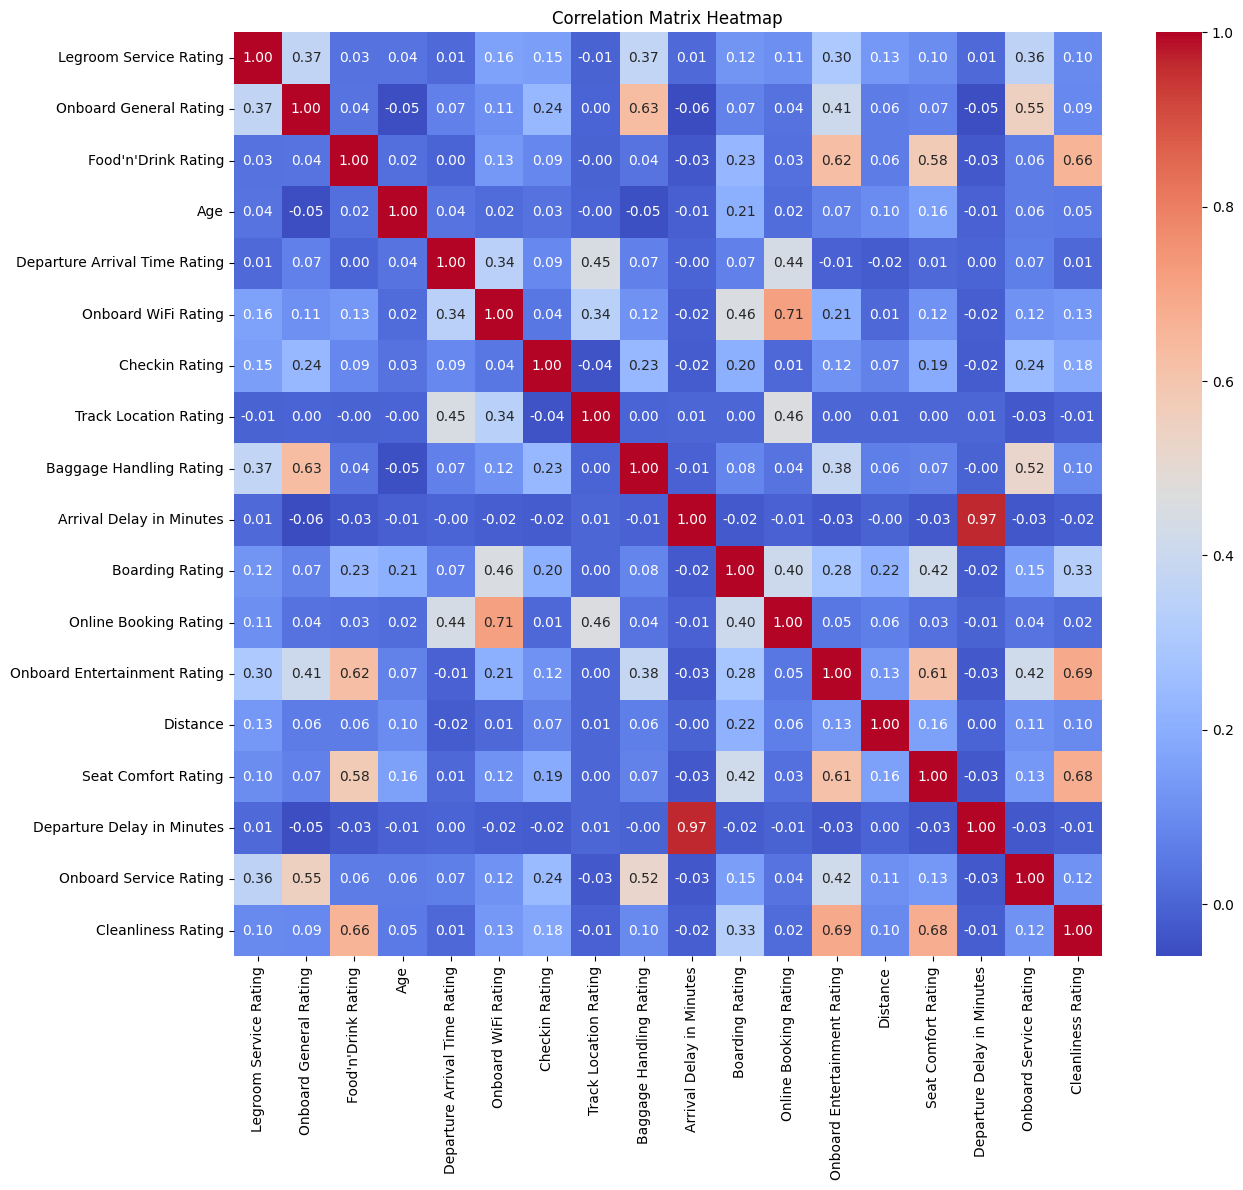

In [163]:
# Plotting the correlation matrix between numerical variables as a heatmap
num_cols = trains_df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = trains_df[num_cols].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")

Cells containing positive values indicate a positive correlation between two features, while a negative value indicates a negative correlation. The closer the value is to 0, the weaker the correlation between the two features, while the closer the value is to 1 (or -1), the stronger the positive (or negative) correlation between the two features. In this correlation matrix we can observe that the highest correlation (excluding the values along the diagonal and the correlation between 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' which is quite straightforward) was achieved by 'Online Booking Rating' and 'Onboard Wifi Rating' which can be explained by the fact that both features are related to the online experience of the customer. Other relevant high correlation scores were achieved between 'Cleanliness Rating' and 'Onboard Entertainment Rating', between 'Seat Rating' and 'Cleanliness Rating', and lastly between 'Cleanliness Rating' and 'Onboard Entertainment Rating', which show how customers positively valued a clean environment and its comforts.

*Be aware* that the correlation matrix displayed is taking into account only the numerical variables (since we still haven't proceeded with the encoding of the categorical variables), hence our target variable 'Satisfied' is not included in the heatmap.

#### **COUNTPLOTS**
 
Countplots in Seaborn are used to visualize the frequency of categorical and numerical data; using seaborn.countplot() we get to display the counts of observations in each categorical bin using bars. Especially useful in exploring and comparing data, countplots assist in identifying dominant categories, detecting any imbalances or variations in the data, grasping the distribution and relative frequencies of various categories through the visualization of each category’s counts as vertical bars or columns.

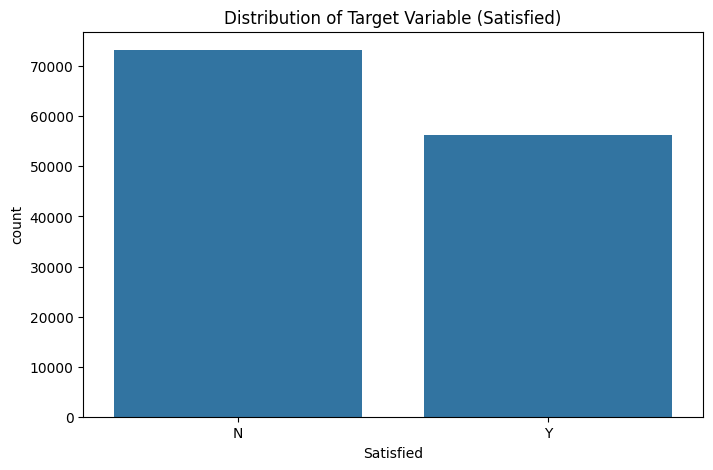

In [164]:
# analyzing the distribution of the target categorical variable 'Satisfied'
plt.figure(figsize=(8, 5))
sns.countplot(x='Satisfied', data=trains_df)
plt.title('Distribution of Target Variable (Satisfied)')
plt.show()

In [165]:
# Calculating the distribution of the 'Satisfied' class
class_distribution = trains_df['Satisfied'].value_counts(normalize=True) * 100

# Convert the Series to a DataFrame and print it
class_distribution_df = class_distribution.to_frame().reset_index()
class_distribution_df.columns = ['Satisfied', 'Percentage']

# print the dataframe
print(class_distribution_df)

  Satisfied  Percentage
0         N   56.550078
1         Y   43.449922


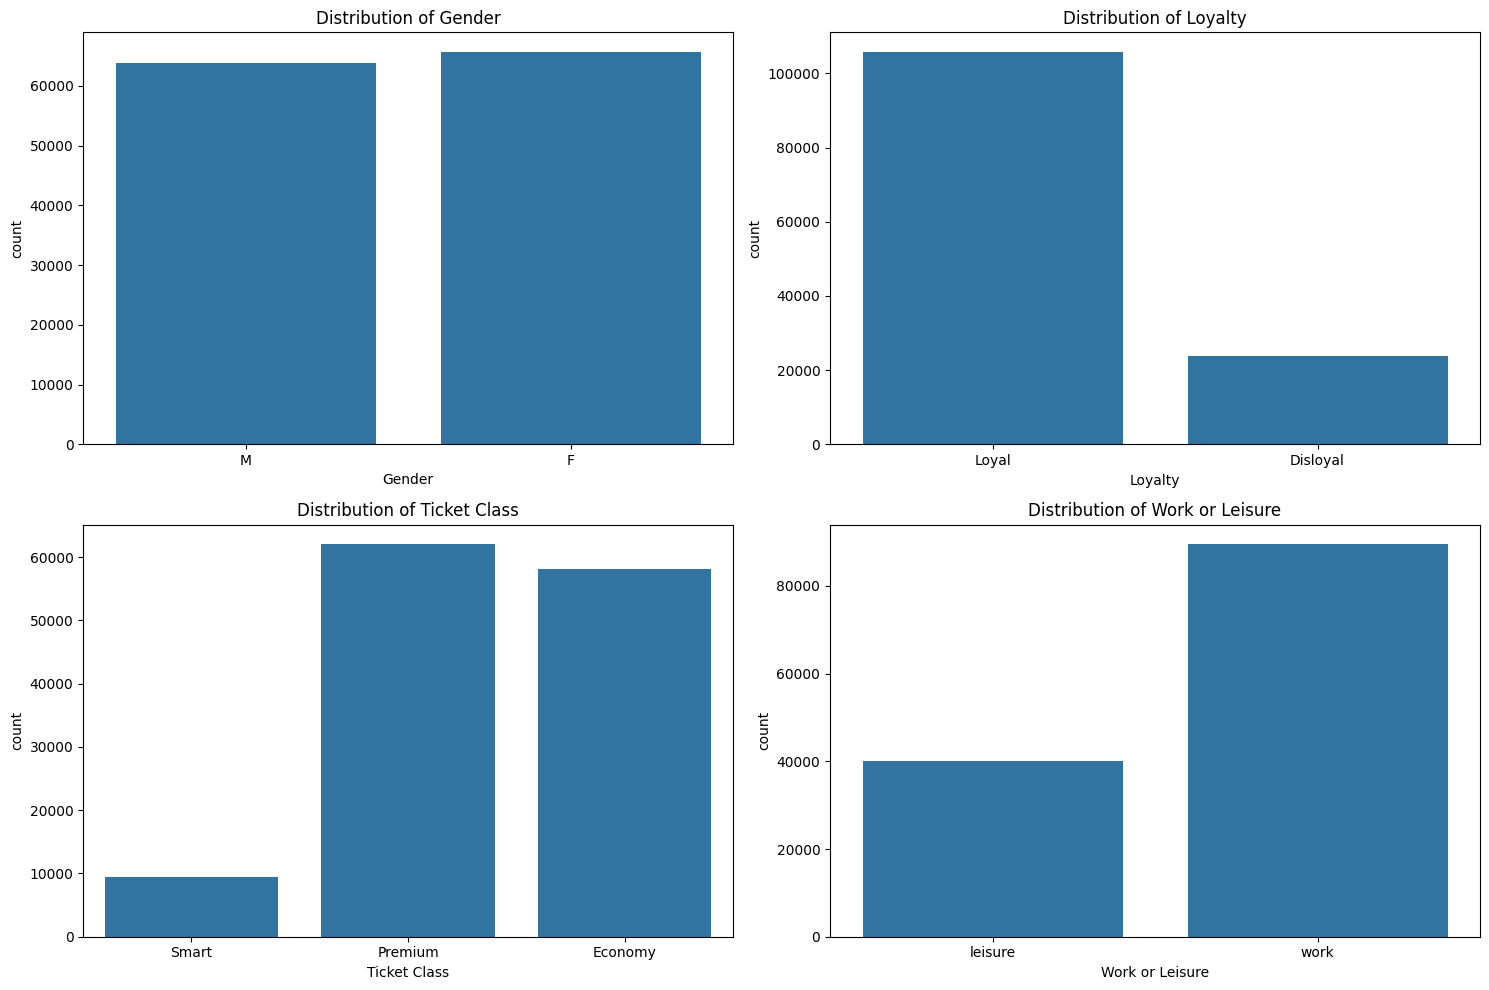

In [166]:
# let's select the other categorical variables to be visualized
categorical_features = ['Gender', 'Loyalty', 'Ticket Class', 'Work or Leisure']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, cat in enumerate(categorical_features):
    row, col = i // 2, i % 2
    sns.countplot(x=cat, data=trains_df, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {cat}')
plt.tight_layout()
plt.show()

By plotting the above histograms, we get a better understanding of the distribution of our categorical variables:

• **Satisfied**: for our target variable we can immediately see that the number of satisfied customers is lower than the number of unsatisfied customers, which could already be an indicator of a general trend in the data that might lead to a slightly unbalanced dataset;

• **Gender**: the presence of male and female customers was almost perfectly balanced in our dataset; 

• **Distribution of Loyalty**: customers that had already joined the company's loyalty program were more likely to use again the services provided by the company rather than customers that were not part of the loyalty program; this shows how the data collected for this analysis mainly came from regular customers who might have experienced the company' services more than once, making their ratings more reliable; 

• **Distribution of Ticket Class**: the purchase levels of Premium and Economy tickets registered almost the same values for both, while Smart Class tickets were only purchased by a small fraction of the total customers; therefore, the company might be facing two different types of customers: the ones that are willing to spend more for a better service (Premium Class) and the ones that are more price-sensitive and are willing to sacrifice some comfort for a cheaper ticket(Economy Class), without having an 'in-between' category of customers that are willing to spend a little more for a better service than the Economy Class but not as much as the Premium Class (Smart Class);

• **Distribution of Work or Leisure**: the majority of the customers were travelling for work rather than for leisure; this could be explained by the fact that the company mainly operates in the business sector, providing services for business travellers rather than for leisure travellers;


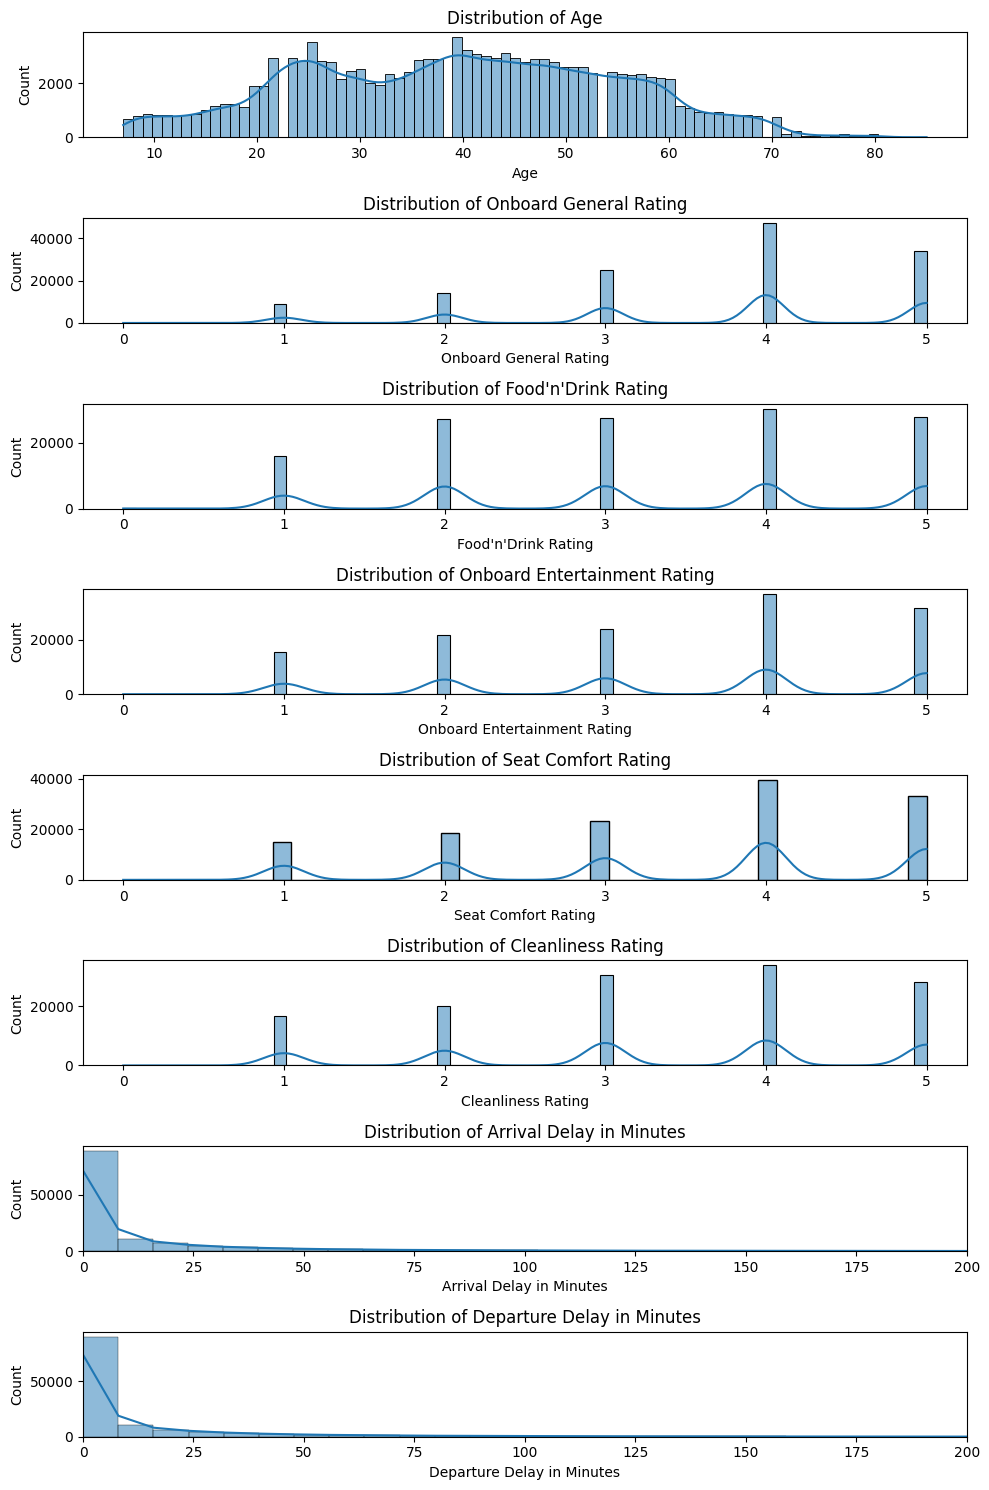

In [167]:
# now we will analyze the distribution of the numerical variables
numerical_features = ['Age','Onboard General Rating',"Food'n'Drink Rating",'Onboard Entertainment Rating','Seat Comfort Rating','Cleanliness Rating', 'Arrival Delay in Minutes','Departure Delay in Minutes']
# create a figure with subplots
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(10, 15))

# plot distribution plots for each numerical feature
for i, col in enumerate(numerical_features):
    if col == 'Arrival Delay in Minutes' or col == 'Departure Delay in Minutes':
        sns.histplot(data=trains_df, x=col, bins=200, kde=True, ax=axes[i])
        axes[i].set_xlim(0, 200)
        axes[i].set_title(f'Distribution of {col}')
    else:
        sns.histplot(data=trains_df, x=col, ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Here we proceed with further considerations about the distribution of the numerical variables:

• **Ratings**: the ratings of the different services provided by the company were mainly positive, with the majority of the customers giving a rating of 4 out of 5; this could be an indicator of a good service provided by the company, but it could also be a sign of a biased dataset, since customers that were not satisfied with the service provided by the company might have decided to not give any rating at all;

• **Distribution of Age**: the age distribution of the customers was quite balanced between 20 and 60 years-old people with a slight skewness towards the younger and older customers; this could be explained by the fact that the company might mainly operate in the business sector (as showned by the majority of customers travveling for work purposes), providing services for business travellers rather than for leisure travellers, which are usually aged between 20 and 60 years old;

• **Distribution of Departure and Arrival Delay in minutes**: the distribution of the departure and arrival delay in minutes was quite similar since these two features are highly correlated, with the majority of the customers experiencing a delay of less than 10 minutes; this could be an indicator of a good service provided by the company, but it could also be a sign of a biased dataset, since again customers that experienced a delay of more than 10 minutes might have decided to not give any rating at all. 

### *Correlation Analysis with our TARGET VARIABLE* 

Let's understand the **role** of our **target variable** 'Satisfied':
- how it **affect** the other variables 
- what are the **relationships** with the other variables.

Before plotting the correlation matrix, we need to map the binary categorical variable 'Satisfied' into a numerical range of [0,1]

In [168]:
# Step 1: Verifing the binary nature of the target variable
print("Unique values before mapping:", trains_df['Satisfied'].unique())


Unique values before mapping: ['N' 'Y']


In [169]:
# Step 2: Apply the mapping; 1 for 'Y' and 0 for 'N'
trains_df['Satisfied'] = trains_df['Satisfied'].map({'Y': 1, 'N': 0})

In [170]:
# Step 3: Inspect the result
print("\nUnique values after mapping:", trains_df['Satisfied'].unique())
print("\nFirst few rows after mapping:")
print(trains_df['Satisfied'].head())


Unique values after mapping: [0 1]

First few rows after mapping:
0    0
1    0
2    1
3    0
4    1
Name: Satisfied, dtype: int64


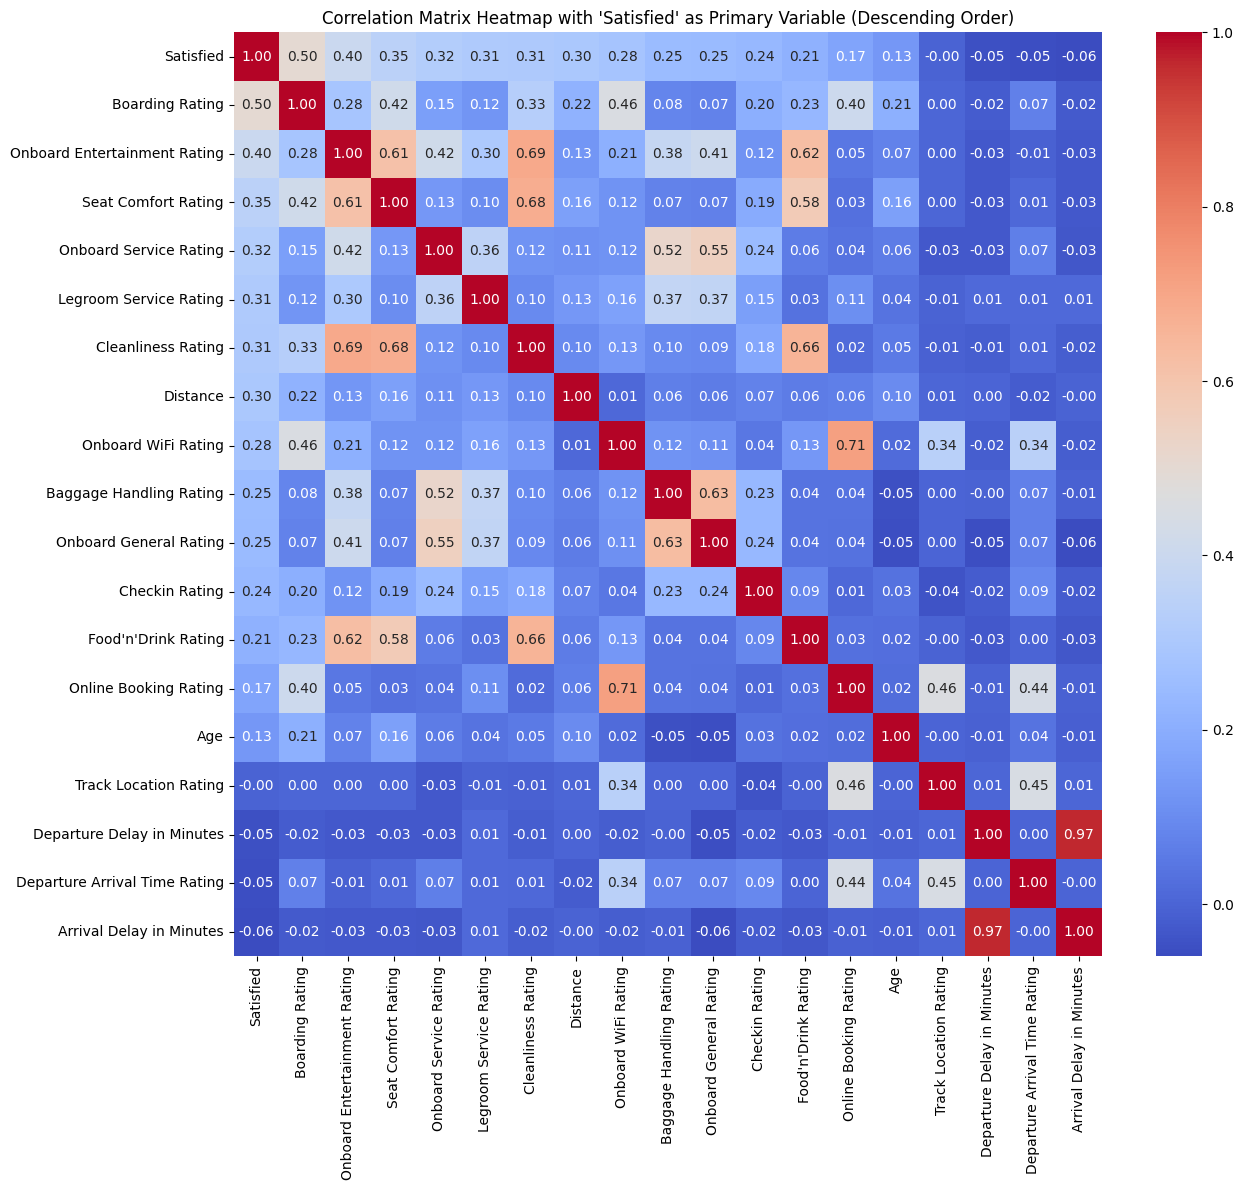

In [171]:
# Including 'Satisfied' in the list to calculate its correlation with other numerical variables
num_cols_with_target = num_cols + ['Satisfied']

# Calculate the correlation matrix
corr_matrix = trains_df[num_cols_with_target].corr()

# Extract the 'Satisfied' column (excluding the 'Satisfied' row) and sort in descending order
satisfied_corr = corr_matrix['Satisfied'].drop('Satisfied').sort_values(ascending=False)

# Get the sorted indices, placing 'Satisfied' first
sorted_indices = ['Satisfied'] + list(satisfied_corr.index)

# Reorder the correlation matrix
corr_matrix_sorted = corr_matrix.loc[sorted_indices, sorted_indices]

# Create the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix_sorted, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap with 'Satisfied' as Primary Variable (Descending Order)")
plt.show()



Now, we can finally visualize the correlation of the target variable with the other numerical features of our trains_df datset; before proceeding with further considerations, we decided to restrict our analysis to the numerical features displaying a correlation with the 'Satisfied' variable higher than 0.24 (not included) in order to focus on the top ten most correlated variables. 

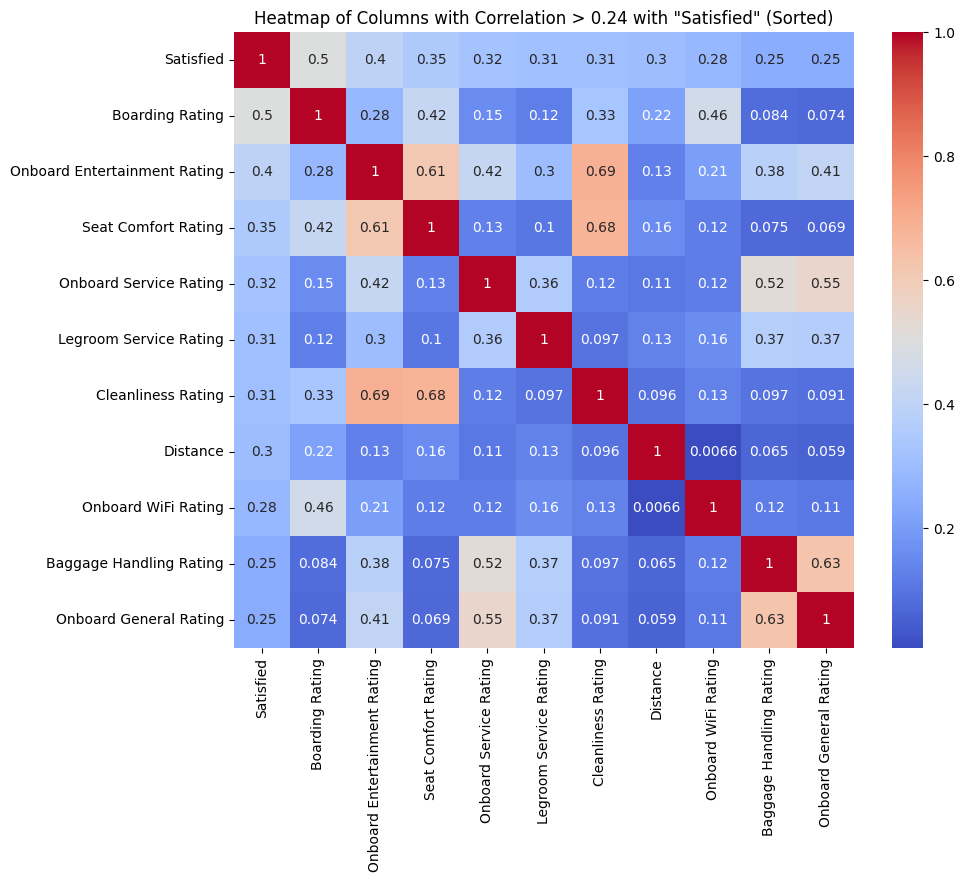

In [172]:
# Find columns where the absolute correlation with 'Satisfied' is greater than 0.24
cols_with_high_corr = corr_matrix.index[abs(corr_matrix['Satisfied']) > 0.24].tolist()

# Filter the correlation matrix to include only these columns
filtered_corr_matrix = corr_matrix.loc[cols_with_high_corr, cols_with_high_corr]

# Sort the filtered columns (excluding 'Satisfied') based on their correlation with 'Satisfied' in descending order
satisfied_corr_filtered = filtered_corr_matrix['Satisfied'].drop('Satisfied').sort_values(ascending=False)

# Get the sorted indices, placing 'Satisfied' first
sorted_indices_filtered = ['Satisfied'] + list(satisfied_corr_filtered.index)

# Reorder the filtered correlation matrix
filtered_corr_matrix_sorted = filtered_corr_matrix.loc[sorted_indices_filtered, sorted_indices_filtered]

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix_sorted, annot=True, cmap='coolwarm')
plt.title('Heatmap of Columns with Correlation > 0.24 with "Satisfied" (Sorted)')
plt.show()


C:\Users\sebas\AppData\Local\Temp\ipykernel_8400\3394636291.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_corr_values.index, y=top_10_corr_values.values, palette="vlag")


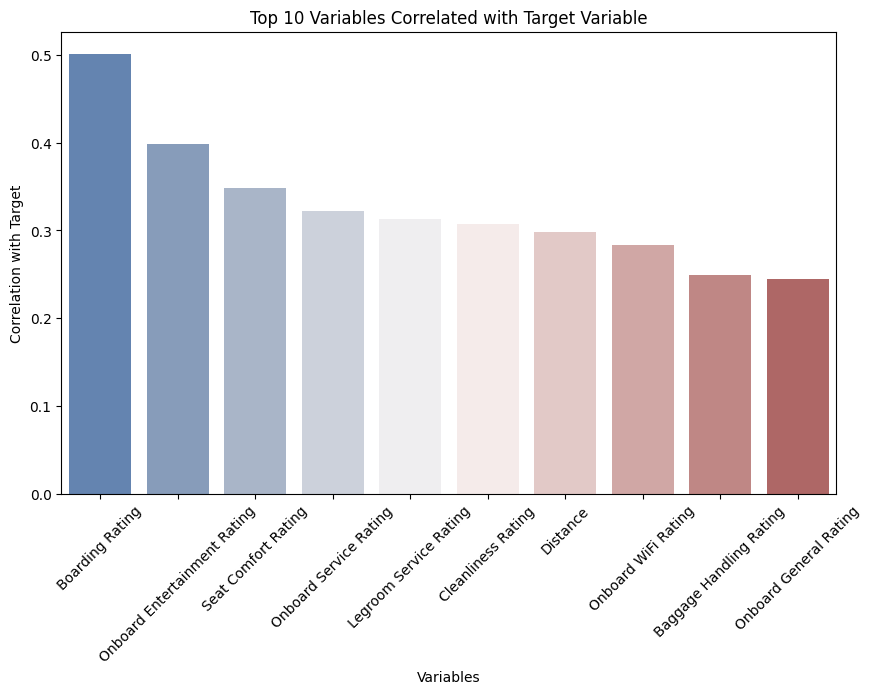

In [173]:
# Filter the DataFrame to include only the columns with correlation higher than 0.24
filtered_trains_df = trains_df[cols_with_high_corr]
target = 'Satisfied'

# Calculate the correlation and sort by absolute value in descending order
corr_values = filtered_trains_df.corr()[target].drop(target).abs().sort_values(ascending=False)

# Select the top 10 variables
top_10_corr_values = corr_values.head(10)

# Step 2: Create a Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_corr_values.index, y=top_10_corr_values.values, palette="vlag")
plt.xticks(rotation=45)
plt.xlabel('Variables')
plt.ylabel('Correlation with Target')
plt.title('Top 10 Variables Correlated with Target Variable')
plt.show()



The highest correlation with our target variable 'Satisfied' was achieved by the 'Boarding Rating' variable; this could be explained by the fact that the boarding experience is the first contact that the customer has with the company's services, and therefore it is crucial for the customer's satisfaction. However, none of the numerical features achieved a correlation higher than 0.50 with our target variable, which could be an indicator of a subtle correlation between the numerical features and the target variable, and therefore of a frail predictive power of the numerical features on the target variable. The lowest correlation score between the top ten features was achieved by the 'Baggage Handling Rating' variable, which could be explained by the fact that the baggage handling experience is not a crucial factor for the customer's satisfaction, and, what it is quite surprising, by the 'Onboard General Rating' variable; however, the onboard experience is usually related to the comfort of the seating, the onboard entertainment, the food and beverages and many others, which are all rated separately by the customers, and therefore the 'Onboard General Rating' might be the reflection of a 'qualitative' mean between these variables. Moreover, what it's even more surprising is that the correlation between the 'Satisfied' variable and both the 'Departure Delay' and 'Arrival Delay' variables achieved a correlation almost equal to zero; therefore, it appears that the delay of the train was not a crucial factor, as it could have been expected to be, in determining the customer's satisfaction.

## **Preprocessing**

Preprocessing is the **process of preparing raw data**, an **essential step** in any machine learning project, as it can **help to improve** the **performance and accuracy** of the model.  

The **goal** of preprocessing is to **transform the raw data** into a **format that is more suitable** for machine learning algorithms. This may involve:
- cleaning the data; 
- handling missing values (as we already did in the EDA section by handling them with Missingno); 
- encoding categorical features (which is exactly what we will do in this section);
- scaling numerical features (we will handle this aspect after the splitting of the dataset).

The **majority of the real-world datasets** for machine learning are **highly susceptible to be missing, inconsistent, and noisy** due to their heterogeneous origin and this would **not give quality results** as it would fail to identify patterns effectively. 
- **Duplicate or missing values** may give an **incorrect view** of the **overall statistics** of data.
- **Outliers and inconsistent data points** often tend to **disturb the model’s overall learning**, leading to **false predictions**.



### Encoding of categorical variables
we used **one-hot encoding** since:
- the categorical feature is nominal (e.g., cwork or leisure etc.);
- the model we are using does not assume any order or hierarchy in the feature (like most tree-based models).

Hence, we proceeded in selecting the Pandas function *get_dummies* for OneHotEncoding. This technique is used to transform categorical data into a binary vector representation; each unique category in the categorical feature is converted into a new binary feature and only one of these binary features is "hot" for each data point, indicating the presence of a specific category. One-Hot Encoding starts by identifiying the unique categories in the categorical feature; it then creates a binary feature (dummy variable) for each category while for each data point, it sets the binary feature corresponding to the category it belongs to as True and all other binary features as False; in the end, it replaces the original categorical feature with the set of binary features.

In our case, we considered this method suitable for our nominal data because it doesn't introduce any artificial relationships between categories and, despite the 'curse of dimensionality', in our case it didn't lead  a large number of features since we didn't obtain  many unique categories.

In [174]:
#let's redifine the categorical values without satisfied
cat_cols= trains_df.select_dtypes(include=['object']).columns
cat_cols

Index(['Ticket Class', 'Loyalty', 'Gender', 'Work or Leisure'], dtype='object')

In [175]:
encoded_trains_df = pd.get_dummies(trains_df, columns=cat_cols)

# Display the result
encoded_trains_df.head()

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Checkin Rating,Track Location Rating,Baggage Handling Rating,Arrival Delay in Minutes,...,Cleanliness Rating,Ticket Class_Economy,Ticket Class_Premium,Ticket Class_Smart,Loyalty_Disloyal,Loyalty_Loyal,Gender_F,Gender_M,Work or Leisure_leisure,Work or Leisure_work
0,3,5,5,13,4,3,4,1,4,18.0,...,5,False,False,True,False,True,False,True,True,False
1,5,4,1,25,2,3,1,3,3,6.0,...,1,False,True,False,True,False,False,True,False,True
2,3,4,5,26,2,2,4,2,4,0.0,...,5,False,True,False,False,True,True,False,False,True
3,5,4,2,25,5,2,1,5,3,9.0,...,2,False,True,False,False,True,True,False,False,True
4,4,3,4,61,3,3,3,3,4,0.0,...,3,False,True,False,False,True,False,True,False,True


Therefore, after encoding the categorical variables, we further explored the correlation between the target variable 'Satisfied' and all the variables, categorical and numerical; we did so by again plotting the correlation matrix and then plotting it as an heatmap. However we limit our analysis to the top 5 most correlated variables. Moreover, in order to get a better visualization of the resulting values, we plotted an ascending barplot with the top 5 most correlated variables with 'Satisfied' overall.

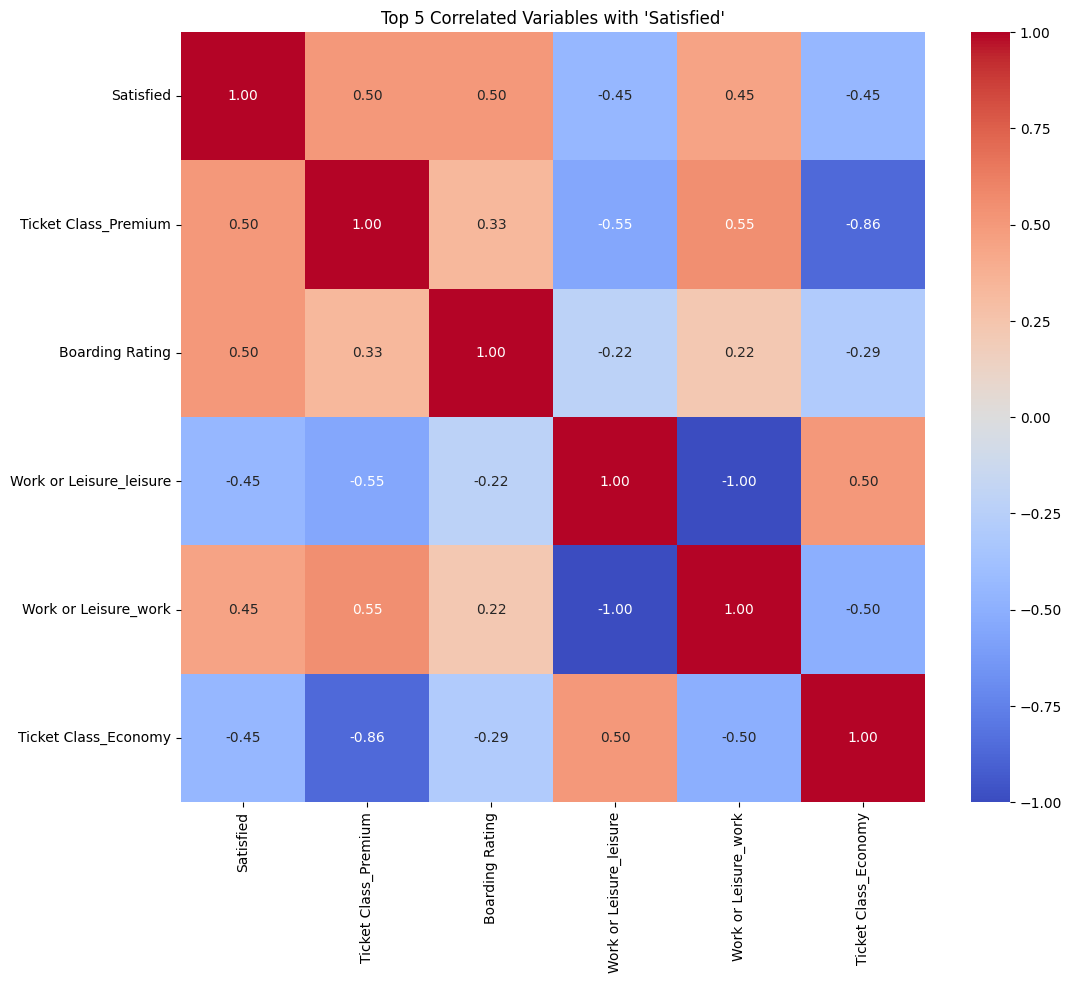

In [176]:
# Calculate the correlation matrix
corr_matrix = encoded_trains_df.corr()

# Extract the 'Satisfied' column (excluding the 'Satisfied' row) and sort by absolute value in descending order
satisfied_corr = corr_matrix['Satisfied'].drop('Satisfied').abs().sort_values(ascending=False)

# Select the top 5 most correlated variables
top_correlated_cols = satisfied_corr.head(5).index.tolist()

# Include 'Satisfied' in the list to see its correlation with these variables
selected_columns = ['Satisfied'] + top_correlated_cols

# Reorder the correlation matrix to include only these selected columns
corr_matrix_selected = corr_matrix.loc[selected_columns, selected_columns]

# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(corr_matrix_selected, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Top 5 Correlated Variables with 'Satisfied'")
plt.show()

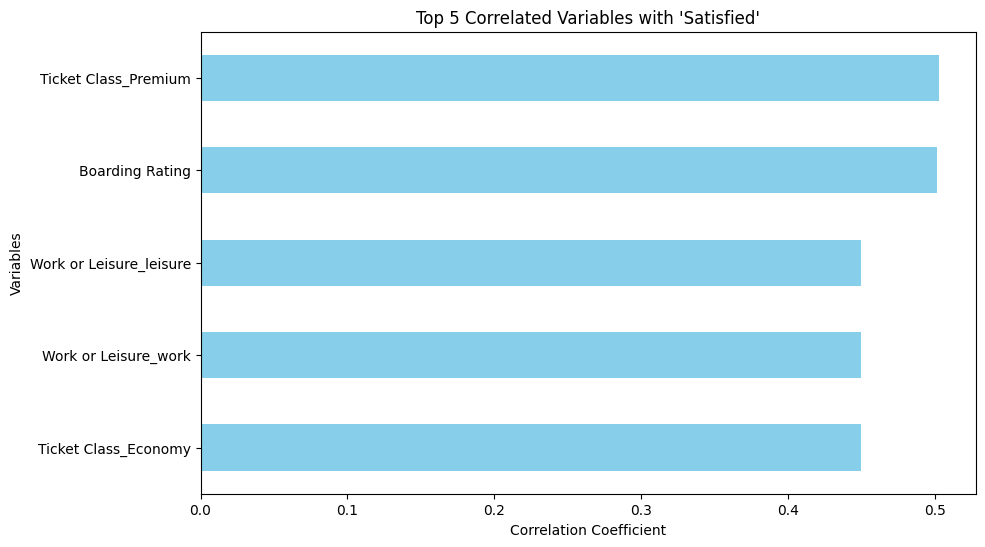

In [177]:
# Extract the 'Satisfied' column (excluding the 'Satisfied' row) and sort by absolute value in descending order
satisfied_corr = corr_matrix['Satisfied'].drop('Satisfied').abs().sort_values(ascending=False)

# Select the top 5 most correlated variables
top_correlated_cols = satisfied_corr.head(5)

# Create an ascending barplot
plt.figure(figsize=(10, 6))  # Adjust the size as needed
top_correlated_cols.sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 5 Correlated Variables with 'Satisfied' (Absolute Values)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Variables")
plt.show()

From the above heatmap and barplot we can observe that the highest correlation with our target variable 'Satisfied' was achieved by 2 variables, the 'Ticket Class_Premium' variable (categorical) and the 'Boarding Rating' (numerical); however, also in this case we didn't achieve a correlation higher than 0.50. As previously discussed, the high correlation between 'Satisfied' and 'Boarding Rating' could be explained by the fact that the boarding experience is the first contact that the customer has with the company's services, and therefore it is crucial for the customer's satisfaction; moreover, the high correlation between 'Satisfied' and 'Ticket Class_Premium' could be explained by the fact that customers that are willing to spend more for a better service (Premium Class) are more likely to be satisfied by the service provided by the company. Furthermore, we can notice an inverse correlation of -0.45 between the target variable and the variables 'Work or Leisure_leisure' and 'Ticket Class_Economy': the first inverse correlation could be explained by the fact that customers travelling for leisure are more likely to buy Economy tickets (as shown by the correlation between 'Work or Leisure_leisure' and 'Ticket Class_Economy' of 0.50 against the correlation between 'Work or Leisure_leisure' and 'Ticket Class_Premium' of -0.55), and therefore they are more likely to be unsatisfied by the service provided by the company; the second inverse correlation could be explained by the fact that customers that are more price-sensitive and are willing to sacrifice some comfort for a cheaper ticket (Economy Class) are, as showed before, more likely to be unsatisfied by the service provided by the company.

## **Splitting the dataset into train and test set**

In this section, we handle two crucial steps in building a machine learning model: 

- **Splitting the dataset** into a **Training set** and a **Test set**: as one could easily deduce from their names, while the train set will be used for the model training, the test set will only be used at the end of the process to evaluate the performance of our models; this is an essential step in order to prevent the *overfitting* of the model (we say that a model is overfitted when it learns too well the training data and it becomes unable to generalize on new data, leading to poor performance on the test set). Notice that before splitting the data we drop the target variable 'Satisfied' since we want to predict it. For our project we used a split ratio of 75/25, meaning that 75% of the data is used for the train set and 15% of the data is used for the test set;

- **Scaling**: scaling the data is essential to ensure that all the features present in the dataset contribute equally to the model training in order to avoid dominant features; for our project we used the StandardScaler, which standardizes features by making sure that each feature has a mean of 0 and a standard deviation of 1. Note that we fit the scaler only on the training data and not the testing data to avoid data leakage; after fitting the scaler on the training data, we transformed both the training and testing sets.

In [180]:
from sklearn.model_selection import train_test_split


# Define features (X) and target (y)
X = encoded_trains_df.drop('Satisfied', axis=1)
y = encoded_trains_df['Satisfied']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # stratify=y ensures that the train and test sets have the same class distribution as the original dataset

# Display the shapes of the resulting sets
print("Shapes of the split datasets:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Shapes of the split datasets:
X_train shape: (97115, 27), y_train shape: (97115,)
X_test shape: (32372, 27), y_test shape: (32372,)


In [181]:
# Calculate the distribution of y in the original dataset
unique_vals, original_counts = np.unique(y, return_counts=True)

# Calculate the distribution of y_train in the training set
train_unique_vals, train_counts = np.unique(y_train, return_counts=True)

# Calculate the distribution of y_test in the test set
test_unique_vals, test_counts = np.unique(y_test, return_counts=True)

# Print the distributions
print("Distribution of y (Original Dataset):")
print(f"Class {unique_vals[0]}: {original_counts[0]} samples")
print(f"Class {unique_vals[1]}: {original_counts[1]} samples")
print(f"Ratio: {original_counts[1] / (original_counts[0] + original_counts[1])}")

print("\nDistribution of y_train (Training Set):")
print(f"Class {train_unique_vals[0]}: {train_counts[0]} samples")
print(f"Class {train_unique_vals[1]}: {train_counts[1]} samples")
print(f"Ratio: {train_counts[1] / (train_counts[0] + train_counts[1])}")

print("\nDistribution of y_test (Test Set):")
print(f"Class {test_unique_vals[0]}: {test_counts[0]} samples")
print(f"Class {test_unique_vals[1]}: {test_counts[1]} samples")
print(f"Ratio: {test_counts[1] / (test_counts[0] + test_counts[1])}")

Distribution of y (Original Dataset):
Class 0: 73225 samples
Class 1: 56262 samples
Ratio: 0.43449921613752734

Distribution of y_train (Training Set):
Class 0: 54919 samples
Class 1: 42196 samples
Ratio: 0.434495186119549

Distribution of y_test (Test Set):
Class 0: 18306 samples
Class 1: 14066 samples
Ratio: 0.43451130606697147


After the datset splitting we made sure that we performed a balanced split by checking the distribution of the features in the X_train and X_test sets, which resulted to be balanced since both sets presented all 27 features (minus of course the target variable 'Satisfied'); moreover, we checked that the distribution of the target variable was almost identically preserved in the y_train and y_test sets compared to its distribution in the original dataset. 

In [182]:
# Standardize the data
scaler_X = StandardScaler()
scaler_X.fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

In [183]:
#show the shape and composition of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (97115, 27)
X_test shape: (32372, 27)
y_train shape: (97115,)
y_test shape: (32372,)


## **Model Training**


In this section we will train three models we chose to work with for this project:
- **Logistic Regression**
- **KNN**
- **Decion Trees**

The training of each model is carried out by feeding into ecah model the training set we previously defined; the training of model training is followed by the evaluation of the model performance on the test set and the hyperparameter tuning of each model, in order to compare the two phases of the model training. Before starting with the proper models training, we defined the metrics we were going to evaluate the models performances with. 

### **Model Evaluation**
Model evaluation is the *process that uses some metrics* in order to *analyze and visualize the performance* of the models. 

In this project we decide to consider the following metrics:
- **Accuracy**: is defined as the *ratio of the number of correct predictions to the total number of predictions*. This metric is considered as a good starting point for classification problems that have well balanced data and not skewed; however, it is not a good metric when the dataset is imbalanced;

- **Precision**: is the ratio of true positives to the summation of true positives and false positives. It basically *analyses the positive predictions* and it's a particularly useful metric when the cost of false positives is high;

- **Recall**: is the ratio of true positives to the summation of true positives and false negatives. It basically *analyses the number of correct positive samples* and it's a particularly useful metric when the cost of false negatives is high;

- **F1 score**: is the *harmonic mean of precision and recall*. It is seen that during the precision-recall trade-off if we increase the precision, recall decreases and vice versa. The goal of the F1 score is to combine precision and recall.

- **Confusion matrix**: a table used to assess the performances of a classification model; it works by summarizing the counts of true positive, true negative, false positive, and false negative predictions.

- **Receiver Operating Characteristic(ROC) curve**: is a *probabilistic curve* used to *highlight the model’s performance*. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The area under the curve (AUC) is a measure of how well a parameter can distinguish between two groups. The higher the AUC, the better the model is at predicting.

#### Function to Evaluate ecah Model Performance  
We defined a function to evaluate the performance of each model that returns the accuracy, precision, recall, F1 score, confusion matrix and ROC curve of the model; we will use this function after every training and tuning step. 

In [184]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### **1) Logistic Regression**

### *LogR* 
Designed for Classification tasks, Logistic Regression is mainly used in tasks where the aim is to predict a categorical variable, while we assume a linear combination of the features. The output of the model are probabilities of class membership, which is be useful in cases where you want to understand the likelihood of a new instance of belonging to a given class rather than the other: in our case we wanted to understand the probability that a customer will be statisfied or not.
#### *Why Logistic Regression?*
We decided to use Logistic Regression as our first model because we considered it a good baseline model since it provides a simple and interpretable solution that can be used to compare with more complex models, helping to assess whether the additional complexity of other algorithms is justified for a particular problem. Moreover, Logistic Regression is a good starting point for classification problems that have well balanced data and not skewed, which is the case of our dataset. Another important point is that Logistic Regression allows for the assessment of feature importance through the examination of coefficient values However, note that in order to apply this model to our dataset we had to start from the assumption that the features have a linearly decision boundary, which can be beneficial when the relationship between the features and the target variable is approximately linear; therefore, we decided to proceed with the training of this model since we wanted to explore the relationship between the features and the target variable assuming its linearity.

In [185]:
from sklearn.linear_model import LogisticRegression
import time

# Start time: we want to measure how long it takes to train the model
start_time = time.time()

# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model on the standardized data

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# End time
end_time = time.time()

time_log = end_time - start_time


In [186]:
print_score(logistic_model, X_train, y_train, X_test, y_test, train=True)
print_score(logistic_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.39%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.877112      0.869299  0.873851      0.873206      0.873718
recall         0.903512      0.835245  0.873851      0.869379      0.873851
f1-score       0.890117      0.851932  0.873851      0.871024      0.873526
support    54919.000000  42196.000000  0.873851  97115.000000  97115.000000
_______________________________________________
Confusion Matrix: 
 [[49620  5299]
 [ 6952 35244]]

Test Result:
Accuracy Score: 87.54%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.879587      0.869713  0.875448      0.874650      0.875297
recall         0.903420      0.839045  0.875448      0.871232      0.875448
f1-score       0.891344      0.854103  0.875448      0.872724      0.875163
s

### Training Result:
- **Accuracy: 87.39%**
  - The model correctly predicts the class label for approximately 87.39% of the instances in the training set.

- **Precision:**
  - Precision for class 0 (*Unsatisfied*) is 87.71%, and for class 1 (*Satisfied*) is 86.93%. Precision measures the accuracy of the positive predictions made by the model; the higher the value, the higher the ability of the model in avoiding false positives.

- **Recall (Sensitivity):**
  - Recall for class 0 is 90.35%, and for class 1 is 83.52%. Recall measures the ability of the model to capture all the positive instances.

- **F1-Score:**
  - The F1-score, which is the harmonic mean of precision and recall, is around 89.01% for class 0 and 85.19% for class 1.

- **Confusion Matrix:**
  - The model correctly predicted 35,244 instances of class 1 and misclassified 5,299 instances of class 0 and 6,952 instances of class 1.

### Testing Result:
- **Accuracy: 87.54%**
  - The model achieves a similar accuracy of 87.54% on the test set, indicating generalization.

- **Precision, Recall, and F1-Score:**
  - Precision, recall, and F1-score for both classes are consistent with the training set results, indicating that the model performs well on both training and test data.

- **Confusion Matrix:**
  - The model correctly predicts 11,802 instances of class 1, misclassifying 1,768 instances of class 0 and 2,264 instances of class 1.

### Overall Comments:
In summary, the model demonstrates good performance, since it seems to perform consistently on both the training and test sets, which is a positive sign of generalization. However, we will try to improve its performance by tuning the model hyperparameters.  

### **Confusion Matrix and ROC curve:**
The two following figures represent the plot of the Confusion Matrix and of the ROC curve computed using the test set:
- **Confusion Matrix:** the confusion matrix provides a detailed breakdown of the model's performance. The high true positive count (11,802) and true negative count (16,538) indicate that the model is effective in both identifying positive instances and negative instances; the presence of false positives (1,768) and false negatives (2,264) suggests that the model is not perfect. The following ROC curve provides a way to visualize the trade-off between sensitivity and specificity at different probability thresholds.

- **ROC curve:** an AUC value close to 1 (in this case, 0.93) (note that the closer the curve is to the top-left corner, the better the model is at predicting true positives and avoiding false positives) suggests that the logistic regression model has good discriminative power. The ROC curve is a graphical representation of the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity) at various thresholds. In our case, an AUC of 0.93 indicates that the model has a high probability of ranking a randomly chosen positive instance higher, than a randomly chosen negative instance: this means that on average, when the model is given these two randomly chosen instances (satisfied and unsatisfied), it is highly likely to assign a higher probability of being satisfied to the randomly chosen satisfied instance compared to the randomly chosen unsatisfied instance.

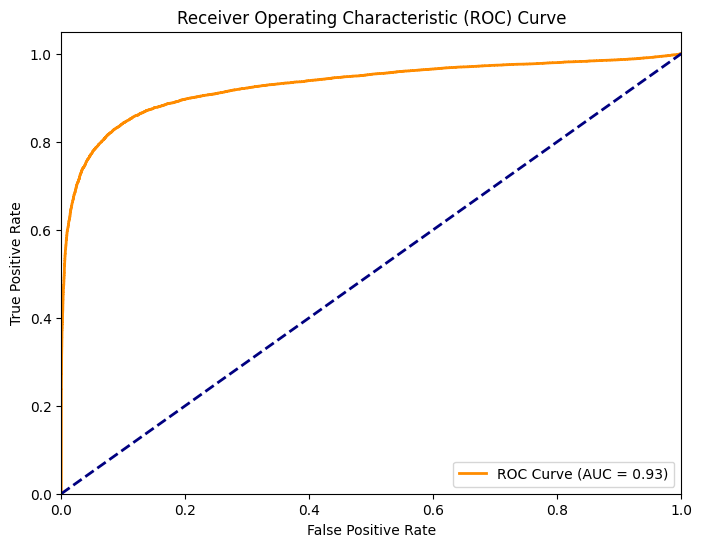

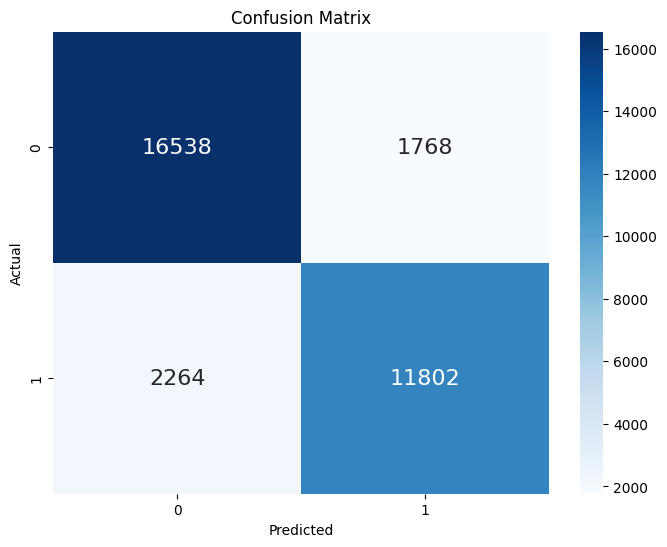

In [187]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, precision_score, recall_score

# Make predictions using the trained Logistic Regression model
y_pred = logistic_model.predict(X_test)

# Calculate accuracy on the test set
accuracy_log = accuracy_score(y_test, y_pred)

# Calculate precision on the test set
precision_log = precision_score(y_test, y_pred)

# Calculate recall on the test set
recall_log = recall_score(y_test, y_pred)

# Calculate confusion matrix on the test set
confusion = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score to generate the report
report = classification_report(y_test, y_pred)

# Calculate ROC curve and AUC
y_prob = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Features evaluation**
Assessing feature importance is an essential step in the training of a model since it helps us in understanding which features contribute most to the model's decision-making process; hence, we can proceed with a feature selection process by identifying unimportant features can lead to more efficient models and faster training times. Moreover, it provides insights into the relationships between features and the target variable.

### *Interpretation*
In order to better visualize the feature importance, we plotted an horizontal barplot, where feature labels are displayed on the y-axis, and the magnitude of their coefficients on the x-axis, and the bars are sorted in descending order, with the most important features at the top. By looking at the below figure, we could deduce that the model gave primary importance to the '*Boardin Rating*' feature in determining whether a client was satisfied or not; moreover, we also noticed that the model considered the passengers *'Gender'* as the least important feature in determining the satisfaction of the customers.

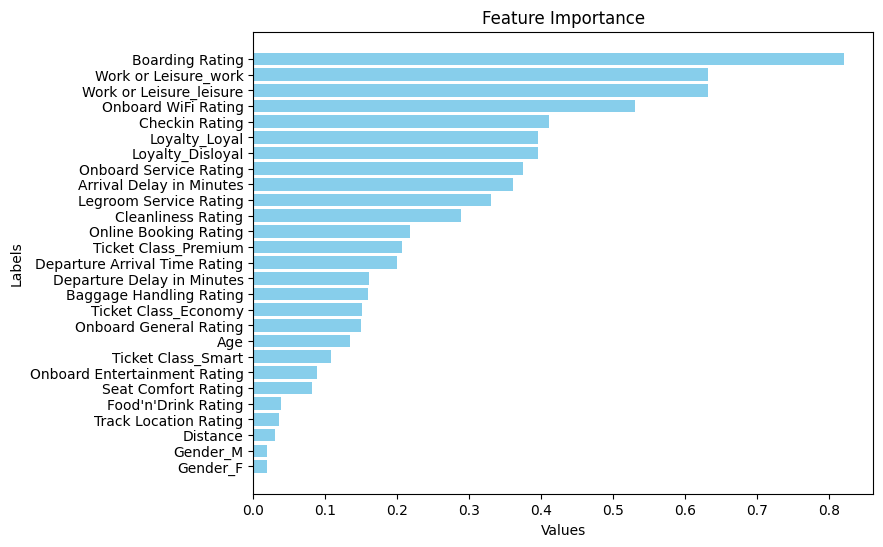

In [188]:
coefficients = np.abs(logistic_model.coef_[0])
feature_names = X.columns
coef_importance = list(zip(feature_names, coefficients))
coef_importance.sort(key=lambda x: x[1], reverse=True)

labels, values = zip(*coef_importance)
plt.figure(figsize=(8, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Labels')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the top feature at the top
plt.show()


## **Hyperparameter Tuning**

Once a model is trained, we proceed with the tuning of its hyperparameters: hyperparameter tuning is a crucial step in the training of a model since it allows us to select the best specifi hyperparameter for the model. Indeed, selecting the hyperparameters selection can heavily influence the performance of a model, improving its generalization ability and helping in avoiding overfitting and underfitting. 

For this project, we devided this part into two steps:

- **Randomized Search:** we fistly used the RandomizedSearchCV algorithm which performs a random search over a specified hyperparameter distribution; instead of trying all possible combinations, it randomly samples a fixed number of hyperparameter configurations from the specified distribution and it uses *cross-validation* to evaluate the performance of each sampled configuration. This approach has two main benefits: it allows us to narrow down the range of hyperparameters to explore, and it allows us to control the computational budget we want to allocate to hyperparameter tuning.

- **Grid Search:** then we applied on the best parameters found, the Grid Search algorithm in order to do a further research regarding the best parameters; it takes as input a dictionary where keys are hyperparameter names, and values are lists of values to try (provided by the Randomized Search). It then evaluates all possible combinations of hyperparameter values using cross-validated performance. Even though this algorithm performs an exhaustive search over a specified hyperparameter grid, it can be more computationally expensive, especially with a large hyperparameter space, compared with Randomized Search (and that's why we decided to further proceed with Grid Search after selecting the best parameter to tune with Randomized Search).

### **Hyperparameter tuning for Logistic Regression**
For the Logistic Regression model, we decided to tune the following hyperparameters:
- **C:** Logistic Regression can be regularized to prevent overfitting; the regularization term, denoted by **'C'**, controls the strength of regularization. Notice that smaller values of C result in stronger regularization, meaning that the model will be more constrained and may generalize better to unseen data while larger values of C reduce the regularization strength, allowing the model to fit the training data more closely; the range is defined using np.logspace(-3, 3, 10), which creates a log scale from 0.001 to 1000 with 10 steps.

- **penalty:** the penalty parameter determines the type of regularization applied in logistic regression. It can take two values: 'l1' (L1 Regularization, also known as Lasso regularization) adds the absolute values of the coefficients as a penalty term to the objective function, and it can lead to sparse coefficients by effectively performing feature selection. On the other hande, we have the 'l2' (L2 Regularization, also known as Ridge regularization) which adds the squared values of the coefficients as a penalty term; moreover, it tends to shrink the coefficients towards zero but does not lead to sparse solutions.

- **solver:** the solver parameter specifies the algorithm to use in the optimization problem. The options we considered are 'liblinear' and 'saga'. Notice that the choice of solver is particularly relevant when using L1 penalty ('l1'). While the *liblinear* solver is suitable for both L1 and L2 regularization and it is efficient for small to medium-sized datasets, the *saga* (Stochastic Average Gradient Descent) is a variant of the 'liblinear' solver that supports both L1 and L2 regularization and it is particularly useful when dealing with large datasets, as it can be faster than 'liblinear' for such scenarios. The choice of the solver can affect the convergence speed and efficiency of the optimization process; moreover, the solver parameter influences with the choice of regularization type (penalty) since not all solvers support both L1 and L2 regularization.

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [190]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'C': np.logspace(-3, 3, 10),  # Logspace from 0.001 to 1000 in 10 steps
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # Solvers that support l1 penalty
}

# Create a logistic regression model instance
logreg = LogisticRegression()

# RandomizedSearchCV instance
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV:")
print(random_search.best_params_)

c:\Users\sebas\Anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found by RandomizedSearchCV:
{'solver': 'saga', 'penalty': 'l1', 'C': 0.021544346900318832}


In [191]:
# Start time
start_time = time.time()

# Define a more refined grid based on the results from RandomizedSearchCV
param_grid = {
    'C': [random_search.best_params_['C'] * 0.5, 
          random_search.best_params_['C'], 
          random_search.best_params_['C'] * 1.5],
    'penalty': [random_search.best_params_['penalty']],
    'solver': [random_search.best_params_['solver']]
}

# GridSearchCV instance
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# End time
end_time = time.time()

time_log_tuned = end_time - start_time

Best parameters found by GridSearchCV:
{'C': 0.021544346900318832, 'penalty': 'l1', 'solver': 'saga'}


**Best parameters found by RandomizedSearchCV:**
{'solver': 'saga', 'penalty': 'l1', 'C': 0.021544346900318832}

**Best parameters found by GridSearchCV:**
{'C': 0.021544346900318832, 'penalty': 'l1', 'solver': 'saga'}

By comparing the two outputs, we can observe that the best combination of hyperparameters found by the first algorithm was confirmed by the second algorithm, which could be seen as positive sign of consistency, but also as an indicator of the fact that the implementation of Grid Search on top of Randomized Search might have been superfluous. 

In [192]:
# Make predictions using the tuned Logistic Regression model
grid_search.best_estimator_


LogisticRegression(C=0.021544346900318832, penalty='l1', solver='saga')

Once we tune our model and select the best hyperparameters, we analyze again the results obtained by computing and plotting the previously defined evaluation metrics and we obtained the following results:
### Training Result:
- **Accuracy: 87.41%**
  - The model correctly predicts the class label for approximately 87.41% of the instances in the training set.

- **Precision, Recall, and F1-Score:**
  - Precision for class 0 (*Unsatisfied*) is 87.73%, and for class 1 (*Satisfied*) is 86.95%. Recall for class 0 is 90.37%, and for class 1 is 83.55%. The F1-score for class 0 is 89.03%, and for class 1 is 85.22%.

- **Confusion Matrix:**
  - The confusion matrix shows that the model correctly predicted 35,254 instances of class 1 and misclassified 5,289 instances of class 0 and 6,942 instances of class 1.

### Testing Result:
- **Accuracy: 87.55%**
  - The model achieves a similar accuracy of 87.55% on the test set, indicating good generalization.

- **Precision, Recall, and F1-Score:**
  - Precision, recall, and F1-score for both classes are consistent with the training set results, indicating that the model performs well on both training and test data.

- **Confusion Matrix:**
  - The model correctly predicts 11,809 instances of class 1 and misclassifies 1,772 instances of class 0 and 2,257 instances of class 1.

### Overall Comments:
In summary, even if the model demonstrates again good performance, since it seems to perform consistently on both the training and test sets, if we compare the original Logistic Regression and the tuned model, we can only notice a really minimal improvement in the evaluation metrics outputs; inded if we pay attention to the ROC curves obtained from the original model and the tuned one, we will notice that both achieved an identical AUC of 0.93. This might indicate that the Logistic Regression model is already performing at its best and that the tuning of the hyperparameters might not be the best approach to improve its performance, since the relationship between the target variable and the input features is **not perfectly linear** as we previously assumed.

In [193]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_model = grid_search.best_estimator_

print_score(best_model, X_train, y_train, X_test, y_test, train=True)
print_score(best_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.41%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.877289      0.869546  0.874057      0.873418      0.873925
recall         0.903695      0.835482  0.874057      0.869588      0.874057
f1-score       0.890296      0.852174  0.874057      0.871235      0.873732
support    54919.000000  42196.000000  0.874057  97115.000000  97115.000000
_______________________________________________
Confusion Matrix: 
 [[49630  5289]
 [ 6942 35254]]

Test Result:
Accuracy Score: 87.55%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.879889      0.869524  0.875541      0.874706      0.875385
recall         0.903201      0.839542  0.875541      0.871372      0.875541
f1-score       0.891393      0.854270  0.875541      0.872831      0.875263
s

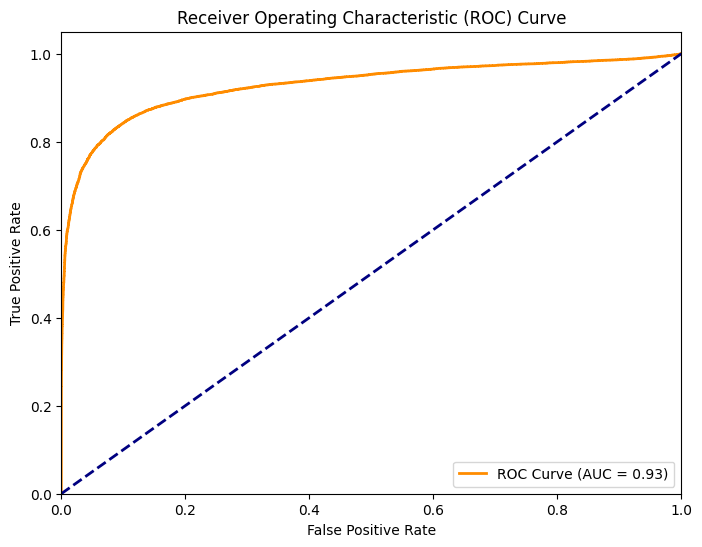

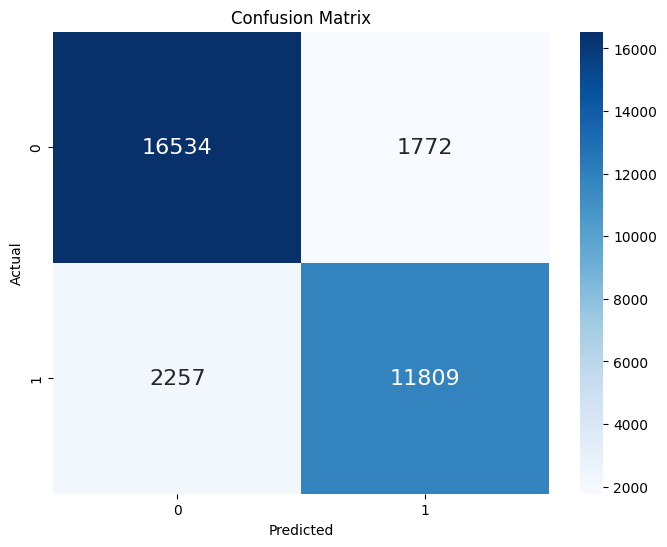

In [194]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Make predictions using the trained Logistic Regression model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy_log_tuned = accuracy_score(y_test, y_pred)

# Calculate precision
precision_log_tuned = precision_score(y_test, y_pred)

# Calculate recall
recall_log_tuned = recall_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

# Calculate ROC curve and AUC
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **2) KNN**

### *K-Nearest Neighbors (KNN)* 
As second model for this project we decided to implemet the K-Nearest Neighbors (KNN); this model works by classifing a new data point by considering the classes of its closest neighbors. Chosen for its capacity to model non-linear relationships and its ability to model complex decision boundaries, this model makes no assumptions about the data distribution and it is considered a '*non-parametric and lazy learning*' algorithm, which means it does not learn a fixed set of parameters from the training data.

#### *Why KNN?*
We decided to use KNN as our second model because we considered it a good baseline model since it provides a simple and interpretable solution that can be used to compare with more complex models, helping to assess whether the additional complexity of other algorithms is justified for a particular problem. Moreover, KNN is a good starting point for classification problems that have well balanced data and not skewed, which is the case of our dataset. Moreover, KNN can model complex decision boundaries and is effective in scenarios where the relationship between features and the target variable is nonlinear.

In [195]:
from sklearn.neighbors import KNeighborsClassifier

# Start time
start_time = time.time()

# Create a KNN model
knn_classifier = KNeighborsClassifier()

# Train the model on the standardized data
knn_classifier.fit(X_train, y_train)

# End time
end_time = time.time()

time_knn = end_time - start_time

Again we analyze the results obtained with our evaluation metrics:

### Training Result:
- **Accuracy Score: 94.87%**
  - The model achieves a high accuracy of 94.87% on the training set, indicating that it correctly predicted the class labels for a large majority of instances.

- **Precision, Recall, and F1-Score:**
  - For class 0, precision is 93.47%, recall is 97.76%, and F1-score is 95.57%. For class 1, precision is 96.90%, recall is 91.11%, and F1-score is 93.92%. 

- **Confusion Matrix:**
  - The confusion matrix shows that the model correctly predicted 38,444 instances of class 1, but misclassified 1,229 instances of class 0 and 3,752 instances of class 1.

### Testing Result:
- **Accuracy Score: 92.79%**
  - The model achieves a high accuracy of 92.79% on the test set, indicating good generalization.

- **Precision, Recall, and F1-Score:**
  - For class 0, precision is 91.34%, recall is 96.39%, and F1-score is 93.80%. For class 1, precision is 94.94%, recall is 88.10%, and F1-score is 91.39%. 

- **Confusion Matrix:**
  - The confusion matrix for the test set shows that the model correctly predicted 12,392 instances of class 1, but misclassified 660 instances of class 0 and 1,674 instances of class 1.

 - **ROC curve:** again the AUC value close to 1 (in this case, 0.97) suggests that the KNN model has an even better discriminative power compared to the previous logistic regression. 

### Insights:
The model demonstrates strong performance on both the training and test sets, with high accuracy scores and a high capacity of generalization on new data, even if the test set achieved a slightly lower accuracy score. However, the lower recall for class 1 (Satisfied) in both training and test sets might suggest that the model is classifying more false negatives instead of correctly identifying class 1; this can be confirmed by the confusion matrix that shows us how the model 3,752 instances of class 1 in the training set and 1,674 instances of class 1 for the test set, compared with the 1,229 missclassified instances of class 0 in the training set and the 660 missclassified instances of class 0 in the test set.

In [196]:
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 94.87%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.934682      0.969022   0.94871      0.951852      0.949602
recall         0.977622      0.911082   0.94871      0.944352      0.948710
f1-score       0.955670      0.939159   0.94871      0.947414      0.948496
support    54919.000000  42196.000000   0.94871  97115.000000  97115.000000
_______________________________________________
Confusion Matrix: 
 [[53690  1229]
 [ 3752 38444]]

Test Result:
Accuracy Score: 92.79%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.913354      0.949433  0.927901      0.931394      0.929031
recall         0.963946      0.880990  0.927901      0.922468      0.927901
f1-score       0.937968      0.913932  0.927901      0.925950      0.927524
s

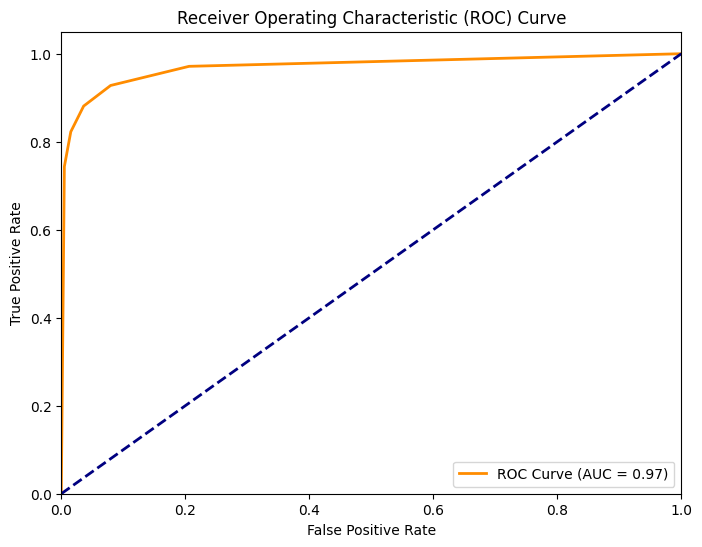

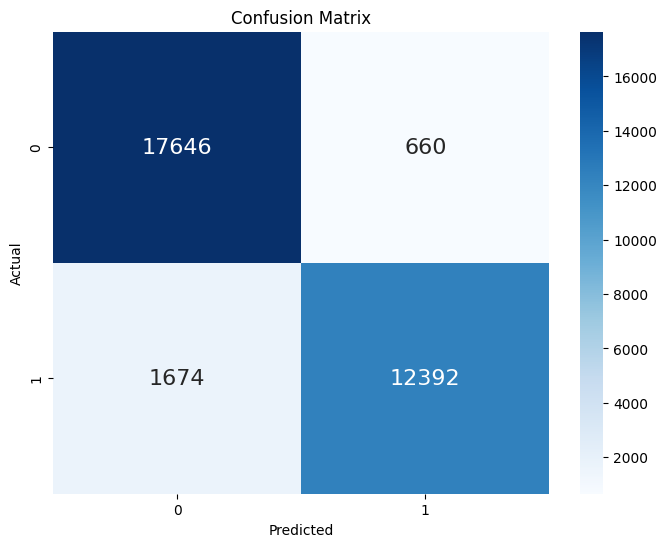

In [197]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Make predictions using the trained Logistic Regression model
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred)

# Calculate precision
precision_knn = precision_score(y_test, y_pred)

# Calculate recall
recall_knn = recall_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

# Calculate ROC curve and AUC
y_prob = knn_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Hyperparameter Tuning of KNN**
For the KNN model we proceeded as for the logistic regression by using both Randomized Search and Grid Search; hence, we decided to tune the following hyperparameters:

- **n_neighbors:** this hyperparameter determines the number of neighbors considered when making predictions for a new data point: a lower value of n_neighbors makes the model more sensitive to local patterns but might be more influenced by noise, while a higher value makes the model more robust but might smooth out local variations. The range specified (range(3, 17)) means that the search will consider values from 3 to 16 for the number of neighbors.

- **weights:** the weights hyperparameter determines how the contributions of neighboring points are weighted when making predictions for a new data point. It has two options: **'uniform'** which means that all neighbors are given equal weight, hence regardless of their distance each neighbor contributes equally to the decision, and **'distance'** which means that closer neighbors have more influence than farther neighbors, so that the weight is inversely proportional to the distance, giving more importance to nearby neighbors.

- **metric:** this hyperparameter specifies the distance metric used to measure the distance between data points; the choice of distance metric is crucial, as it affects how the algorithm calculates the similarity between instances. For our project we considered the following metrics: **'euclidean'** distance which is the straight-line distance between two points in space, the **'manhattan'** distance (also known as L1 distance) which is the sum of the absolute differences between corresponding coordinates (which is also the most suitable when dealing with categorical data), and lastly the
**'minkowski'** distance which is a generalization of both Euclidean and Manhattan distances, as the parameter p in the Minkowski distance formula allows tuning between Euclidean (p=2) and Manhattan (p=1) distances.

In [198]:
from sklearn.model_selection import RandomizedSearchCV


In [199]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_neighbors': range(3, 17),  # Neighbors from 3 to 16
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create a KNN model instance
knn = KNeighborsClassifier()

# RandomizedSearchCV instance
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1, verbose=3)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV:")
print(random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Best parameters found by RandomizedSearchCV:
{'weights': 'distance', 'n_neighbors': 8, 'metric': 'manhattan'}


In [200]:
# Start time
start_time = time.time()

# Define a more refined grid based on the results from RandomizedSearchCV
param_grid = {
    'n_neighbors': range(7,10),
    'weights': ['distance'],
    'metric': ['manhattan']
}

# GridSearchCV instance
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# End time
end_time = time.time()

time_knn_tuned = end_time - start_time

Best parameters found by GridSearchCV:
{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}


In this case, we evaluated 50 different combinations of hyperparameters; each candidate model is being trained and evaluated using a 5-fold cross-validation. In each iteration, the dataset is divided into 5 subsets (folds), and the model is trained on 4 of them and validated on the remaining one. This process is repeated 5 times, and the average performance is computed. "Totaling 250 fits" is the product of the number of candidates and the number of folds: in this case, 50 candidates multiplied by 5 folds equals 250 fits. Each fit involves training and evaluating the model on a specific combination of hyperparameters and a specific subset of the data.

**Best parameters found by RandomizedSearchCV**: {'weights': 'distance', 'n_neighbors': 8, 'metric': 'manhattan'}

**Best parameters found by GridSearchCV**: {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}

By comparing the two outputs, we can observe that the best combination of hyperparameters found by the first algorithm was again confirmed by the second algorithm. 

In [201]:
grid_search.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')

Once we tune our model and select the best hyperparameters, we analyze again the results obtained by computing and plotting the previously defined evaluation metrics and we obtained the following results:

### Training Result:
- **Accuracy Score: 100.00%**
  - The model achieves perfect accuracy on the training set, correctly predicting the class labels for all instances. While high accuracy is desirable, we have to be careful in not forgetting to assess other metrics to gain a comprehensive understanding.

- **Precision, Recall, and F1-Score (Class 0 and 1):**
  - Precision, recall, and F1-score for both classes are 1.0, indicating perfect performance. This suggests that the model has no false positives (precision), no false negatives (recall), and achieves a perfect balance between precision and recall (F1-score) for both classes.

- **Confusion Matrix:**
  - The confusion matrix further confirms perfect performance, with no instances misclassified for either class.

### Test Result:
- **Accuracy Score: 93.73%**
  - The model maintains a high accuracy of 93.73% on the test set, even higher than the 92.79% achieved by the original model, demonstrating good generalization from the training set to new, unseen data.

- **Precision, Recall, and F1-Score (Class 0 and 1):**
  - Precision, recall, and F1-score for both classes are still high, with values above 0.90. This indicates strong performance in correctly identifying instances of both classes.

- **Confusion Matrix:**
  - The confusion matrix shows that the model correctly predicts the majority of instances, with some misclassifications. There are 660 instances of class 0 and 1,370 instances of class 1 that are misclassified; again we have a dominance of false positives over false negatives.

- **ROC curve:** we also have a slightly improvement for the AUC value that goes from 0.97 to 0.98, which suggests that the KNN model has an even better discriminative power compared to the original KNN model. 

### Insights:
In summary, the KNN model demonstrates excellent performance, but careful consideration of potential overfitting and the real-world impact of misclassifications is to be kept in mind. After the tuning of the model, for this specific model we could observe a more remarkable improvement compared to logistic regression; this could be explained by the fact that the relationship between the target variable and the input features is **not perfectly linear** as we previously assumed, and therefore the tuning of the hyperparameters might be a better approach to improve its performance.

In [202]:
best_knn = grid_search.best_estimator_
print_score(best_knn, X_train, y_train, X_test, y_test, train=True)
print_score(best_knn, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0        1  accuracy  macro avg  weighted avg
precision      1.0      1.0       1.0        1.0           1.0
recall         1.0      1.0       1.0        1.0           1.0
f1-score       1.0      1.0       1.0        1.0           1.0
support    54919.0  42196.0       1.0    97115.0       97115.0
_______________________________________________
Confusion Matrix: 
 [[54919     0]
 [    0 42196]]

Test Result:
Accuracy Score: 93.73%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.927955      0.950584  0.937291      0.939270      0.937788
recall         0.963946      0.902602  0.937291      0.933274      0.937291
f1-score       0.945608      0.925972  0.937291      0.935790      0.937076
support    18306.000000  14066.000000  0.937291  32372.000000  32

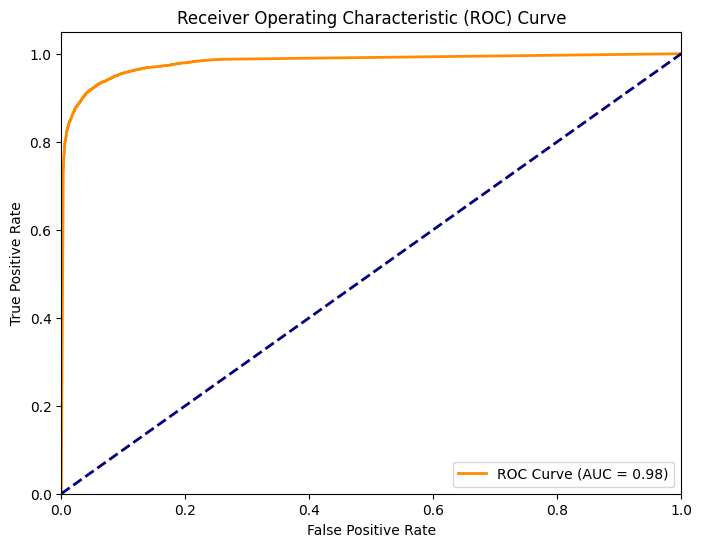

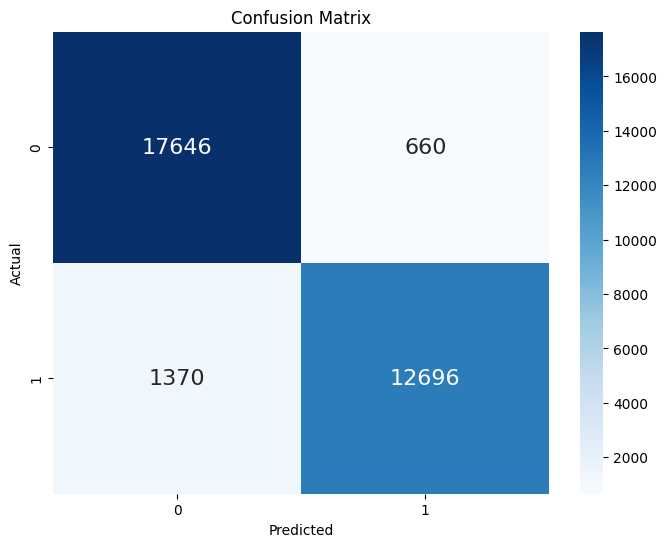

In [203]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Make predictions using the trained Logistic Regression model
y_pred = best_knn.predict(X_test)

# Calculate accuracy
accuracy_knn_tuned = accuracy_score(y_test, y_pred)

# Calculate precision
precision_knn_tuned = precision_score(y_test, y_pred)

# Calculate recall
recall_knn_tuned = recall_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

# Calculate ROC curve and AUC
y_prob = best_knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **3) Decision Trees**
### *Decision Trees* 
The third and last model we selected for this project is *Decision Trees*: they work by recursively splitting the dataset based on feature conditions to create a tree-like structure that makes decisions, where each internal node of the tree represents a decision based on a feature, and each leaf node represents the predicted outcome. The goal is to create a tree that optimally separates the data into homogeneous groups; the decision-making process involves traversing the tree from the root to a leaf, following the branches that correspond to the feature conditions until a final prediction is reached.

#### *Why Decision Trees?*
We selected Decision Trees as our third model since, after seeing the improvement achieved by KNN compared to Logistic Regression, we wanted to keep exploring non-linear models; indeed, Decision trees naturally handle non-linear relationships and interactions between features, and they can capture complex decision boundaries in the data without requiring explicit feature engineering. Moreover, Decision trees are easy to interpret and visualize since the tree structure represents a series of intuitive decisions based on features; we thought this could be a relevant aspect for the purpose of our project (that is to help the marketing team to target specific customers based on their satisfaction) since the marketing team might be interested in the role played by each feature in determining the satisfaction of a customer. 


In [204]:
from sklearn.tree import DecisionTreeClassifier

# Start time
start_time = time.time()

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# End time
end_time = time.time()

time_tree = end_time - start_time

In [205]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0        1  accuracy  macro avg  weighted avg
precision      1.0      1.0       1.0        1.0           1.0
recall         1.0      1.0       1.0        1.0           1.0
f1-score       1.0      1.0       1.0        1.0           1.0
support    54919.0  42196.0       1.0    97115.0       97115.0
_______________________________________________
Confusion Matrix: 
 [[54919     0]
 [    0 42196]]

Test Result:
Accuracy Score: 94.70%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.954272      0.937571  0.946991      0.945921      0.947015
recall         0.951874      0.940637  0.946991      0.946255      0.946991
f1-score       0.953071      0.939101  0.946991      0.946086      0.947001
support    18306.000000  14066.000000  0.946991  32372.000000  32

### Training Result:
- **Accuracy Score: 100.00%**
  - The model achieves perfect accuracy on the training set, correctly predicting the class labels for all instances. This could indicate potential overfitting, as the model may have memorized the training data.

- **Precision, Recall, and F1-Score (Class 0 and 1):**
  - Precision, recall, and F1-score for both classes are 1.0, indicating perfect performance. This suggests that the model has no false positives (precision), no false negatives (recall), and achieves a perfect balance between precision and recall (F1-score) for both classes.

- **Confusion Matrix:**
  - The confusion matrix further confirms perfect performance, with no instances misclassified for either class.

### Test Result:
- **Accuracy Score: 94.70%**
  - The model maintains high accuracy on the test set, demonstrating good generalization from the training set to new, unseen data. The accuracy is slightly less than perfect, suggesting some generalization ability.

- **Precision, Recall, and F1-Score (Class 0 and 1):**
  - Precision, recall, and F1-score for both classes are high, with values above 0.93. This indicates strong performance in correctly identifying instances of both classes on the test set.

- **Confusion Matrix:**
  - The confusion matrix shows that the model correctly predicts the majority of instances, but there are some misclassifications. There are 881 instances of class 0 and 835 instances of class 1 that are misclassified.

  - **ROC curve:** again the AUC value close to 1 (in this case, 0.95) suggests that the Decision Tree model has an even better discriminative power compared to the previous logistic regression, but slightly lower than the KNN model.

### Considerations:
In summary, while the decision tree model demonstrates strong performance, particularly on the training set, it's essential to consider potential overfitting and carefully evaluate the model's generalization to new data; indeed the model may have memorized the training data, resulting in a lack of generalization to new data. However, the model demonstrates strong performance on the test set, with high accuracy and precision, recall, and F1-score values. Some misclassifications are observed in the confusion matrix, indicating areas where the model could be improved.

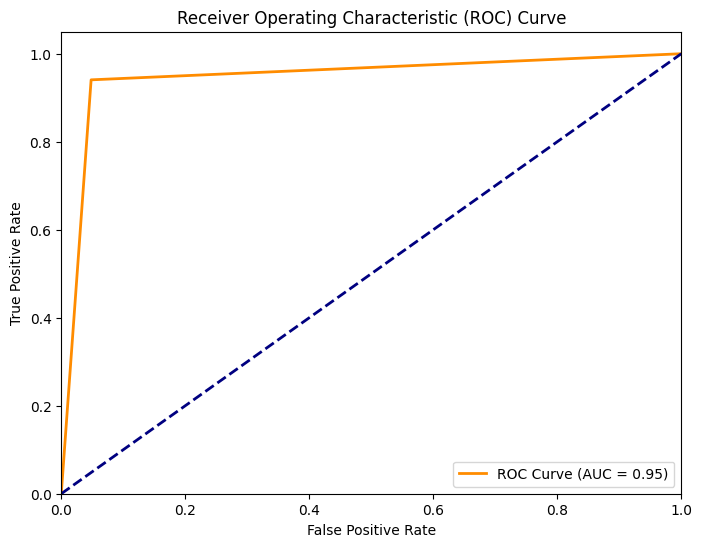

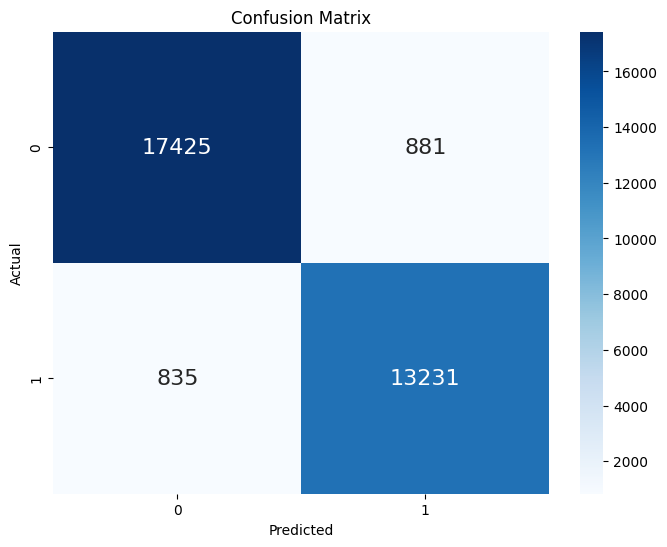

In [206]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Make predictions using the trained Logistic Regression model
y_pred = tree_clf.predict(X_test)

# Calculate accuracy
accuracy_tree = accuracy_score(y_test, y_pred)

# Calculate precision
precision_tree = precision_score(y_test, y_pred)

# Calculate recall
recall_tree = recall_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

# Calculate ROC curve and AUC
y_prob = tree_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Hyperparameter Tuning of Decision Trees**
For the Decision Trees model we proceeded as previously done by using both Randomized Search and Grid Search; hence, we decided to tune the following hyperparameters:

- **criterion:** it determines the function used to measure the quality of a split: *Gini* measures impurity by the Gini index, which is a measure of how often a randomly chosen element would be incorrectly classified, while *Entropy* measures impurity by information gain, which quantifies the amount of information gained by a split.

- **splitter:** it specifies the strategy used to choose the split at each node: *best* chooses the best split based on the specified criterion (Gini or entropy), while *random* chooses the best random split, which can add randomness and potentially improve robustness.

- **max_depth:** it limits the maximum depth of the decision tree, whic means that it restricts the number of levels in the decision tree; notice that a deeper tree can capture more complex patterns but may lead to overfitting.

- **min_samples_split:** it specifies the minimum number of samples required to split an internal node, which means that it sets a threshold for the minimum number of samples required to split an internal node; this helps control the size of the nodes and prevents overfitting.

- **min_samples_leaf:** it determines the minimum number of samples required to be at a leaf node, which means that it sets a threshold for the smallest size of terminal nodes (leaves); a smaller value may result in more complex trees, while a larger value can prevent overfitting.

In [207]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": randint(1, 20),  # Use a distribution for max_depth
    "min_samples_split": randint(2, 5),  # Use a distribution for min_samples_split
    "min_samples_leaf": randint(1, 20),  # Use a distribution for min_samples_leaf
}

# Number of iterations for RandomizedSearchCV to sample
n_iter_search = 150  # You can adjust this depending on how long you're willing to wait

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = RandomizedSearchCV(
    tree_clf,
    param_distributions=params,
    n_iter=n_iter_search,
    scoring="f1",
    n_jobs=-1,
    verbose=1,
    cv=5,
    random_state=42
)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best parameters: {best_params}")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 13, 'min_samples_split': 2, 'splitter': 'best'}


DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_leaf=13)

In [208]:
# Start time
start_time = time.time()

# Assume best_params is obtained from your RandomizedSearchCV
best_params = tree_cv.best_params_

# Define a new, more focused parameter grid based on best_params
param_grid = {
    "criterion": ['entropy'],
    "splitter": ['best'],
    "max_depth": [17,18,19,20],
    "min_samples_split": [2,3,4],
    "min_samples_leaf": [12,13,14,15]
}

# Create a new instance of the DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
tree_grid_search = GridSearchCV(
    tree_clf,
    param_grid,
    scoring="f1",
    n_jobs=-1,
    cv=5,
)

# Fit the GridSearchCV
tree_grid_search.fit(X_train, y_train)

# Extract the best parameters
grid_best_params = tree_grid_search.best_params_
print(f"Best parameters from Grid Search: {grid_best_params}")

# End time
end_time = time.time()

time_tree_tuned = end_time - start_time

Best parameters from Grid Search: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 12, 'min_samples_split': 2, 'splitter': 'best'}


For this model, we evaluated 150 different combinations of hyperparameters; each candidate model is being trained and evaluated using a 5-fold cross-validation. In each iteration, the dataset is divided into 5 subsets (folds), and the model is trained on 4 of them and validated on the remaining one; this process is repeated 5 times, and the average performance is computed. "Totaling 750 fits" is the product of the number of candidates and the number of folds: in this case, 150 candidates multiplied by 5 folds equals 750 fits. Each fit involves training and evaluating the model on a specific combination of hyperparameters and a specific subset of the data.

**Best parameters found by RandomizedSearchCV**: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 13, 'min_samples_split': 2, 'splitter': 'best'}

**Best parameters found by GridSearchCV**: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 12, 'min_samples_split': 2, 'splitter': 'best'}

By comparing the two outputs, we can observe that the second algorithm confirms the combination of best parameters found by the first algorithm, with the exception of the max_depth parameter, which is slightly higher in the second case and the min_samples_leaf parameter, which is slightly lower in the second case.

Once we tune our model and select the best hyperparameters, we analyze again the results obtained by computing and plotting the previously defined evaluation metrics and we obtained the following results:

### Training Result:
- **Accuracy Score: 96.71%**
  - The model still achieves a high accuracy of 96.71% on the training set, indicating that it correctly classifies the majority of instances; however, the accuracy is slightly lower than the 100% achieved by the original model, suggesting some improvement in its generalization ability and a reduction in overfitting.

- **Precision, Recall, and F1-Score (Class 0 and 1):**
  - Precision, recall, and F1-score for both classes are high, with values above 0.96. This indicates strong performance in correctly identifying instances of both classes on the training set, suggesting a well-balanced performance across both classes.

- **Confusion Matrix:**
  - The confusion matrix shows that the model correctly predicts the majority of instances. There are 1,061 instances of class 0 and 2,135 instances of class 1 that are misclassified.

### Test Result:
- **Accuracy Score: 95.28%**
  - The model maintains high accuracy (95.28%) on the test set, demonstrating good generalization from the training set to new, unseen data.

- **Precision, Recall, and F1-Score (Class 0 and 1):**
  - Precision, recall, and F1-score values for both classes remain high on the test set, indicating that the model generalizes well to new data.

- **Confusion Matrix:**
  - The confusion matrix for the test set shows that the model correctly predicts the majority of instances. There are 609 instances of class 0 and 919 instances of class 1 that are misclassified.

- **ROC curve:** in this case, we have the most remarkable improvement for the AUC that goes from 0.95 to 0.99 for the test set, which suggests that the Decision Tree model has an even better discriminative power compared to the original  model, but also compared to every previous model.  

### Considerations:
In summary, if we compare the original model with the tuned one, even if the accuracy on the training set decreased from 100% to 96.71%, the accuracy on the set increased from 94.70% to 95.28%, indicating an improvement in the model generalization ability and a reduction in the model overfitting. Moreover, in this case, we have the most remarkable improvement for the AUC that goes from 0.95 to 0.99 for the test set, which suggests that the Decision Tree model has an even better discriminative power compared to the original model, but also compared to every previous model; notice that the maximum value the AUC can achieve is 1, which means that the model has perfect discriminatory power and it can perfectly distinguish between positive and negative instances without making any errors.   

In [209]:
best_tree_model = tree_grid_search.best_estimator_
print_score(best_tree_model, X_train, y_train, X_test, y_test, train=True)
print_score(best_tree_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.71%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.961870      0.974199  0.967091      0.968034      0.967227
recall         0.980681      0.949403  0.967091      0.965042      0.967091
f1-score       0.971184      0.961641  0.967091      0.966413      0.967038
support    54919.000000  42196.000000  0.967091  97115.000000  97115.000000
_______________________________________________
Confusion Matrix: 
 [[53858  1061]
 [ 2135 40061]]

Test Result:
Accuracy Score: 95.28%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.950634      0.955728  0.952799      0.953181      0.952848
recall         0.966732      0.934665  0.952799      0.950699      0.952799
f1-score       0.958615      0.945079  0.952799      0.951847      0.952734
s

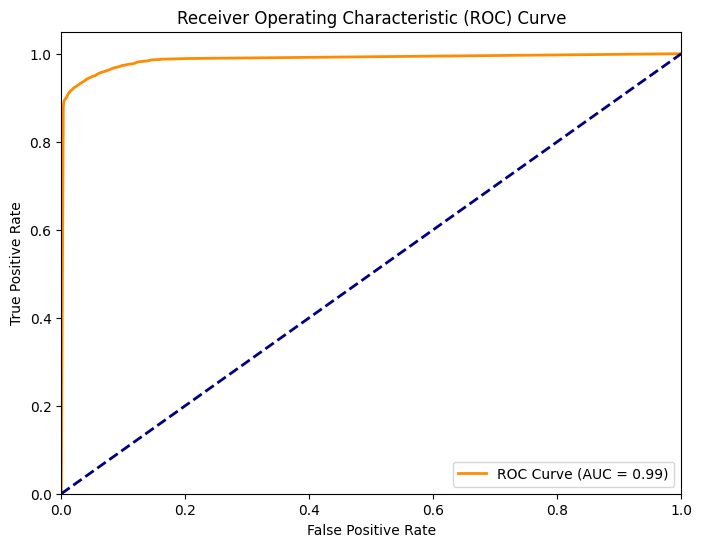

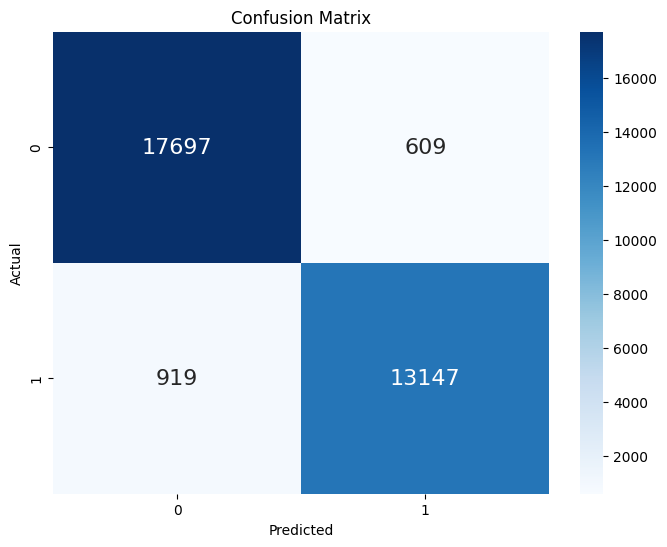

In [210]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Make predictions using the trained Logistic Regression model
y_pred = best_tree_model.predict(X_test)

# Calculate accuracy
accuracy_tree_tuned = accuracy_score(y_test, y_pred)

# Calculate precision   
precision_tree_tuned = precision_score(y_test, y_pred)

# Calculate recall
recall_tree_tuned = recall_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

# Calculate ROC curve and AUC
y_prob = best_tree_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## **Comparing the efficiency of the models**
In this last section of our project we will concentrate in visualizing the comparison between the three different models we trained (Logistic Regression, KNN and Decision Trees) and their tuned versions in order to understand which one is the most efficient in predicting the satisfaction of a customer. Hence we focused on two main aspects:

- **Performance:** the performance of a model in machine learning is a measure of its ability to accurately and effectively make predictions and classifications on new, unseen data based on its training and learning from a given dataset; therefore, we compared the performance of the models by plotting the accuracy, precision and recall of each model on the test set.

- **Time Complexity:** the time complexity of an algorithm is a quantitative measure of the amount of time it takes for the algorithm to complete its task; as a matter of fact, we implemented for each model a timer in order to measure the time it takes for the model to train and predict the target variable.


### *Plotting the performance of the models*
In the below figure we can observe the comparison between the performance of the three models we trained (Logistic Regression, KNN and Decision Trees) and their tuned versions in terms of accuracy, precision and recall on the test set; notice that each model is paired with its tuned version. Overall we can immediately observe that, in general, the tuned models were able to improve the results obtained on every metrics by the original models. Moreover, the *Logistic Regression* model and its tuned version were the ones that achieved the lowest scores for every metric; this confirms our hypothesis that the relationship between the target variable and the input features is **not perfectly linear** as we previously assumed, and therefore the tuning of the hyperparameters might not be the best approach to improve its performance. On the other hand, the tuned version of the *Decision Tree* model was the one that achieved the highest score for every metric, included AUC which scored 0.99 out of 1; if we compare these results with the one obtained from the tuned *KNN* model, they will confirm that the added complexity of the Decision Trees model (with respect to the KNN model, which is usually considered simpler) is justified by the remarkable improvements obtained. This could be explained by the fact that the patterns in our dataset might involve complex decision boundaries; a decision tree might be more adept at capturing and representing these patterns compared to the local averaging approach of KNN. Also, KNN can be sensitive to outliers, as it relies on the majority class of the k-nearest neighbors while decision trees are more robust to them because they make decisions based on the majority class within regions of the feature space. 

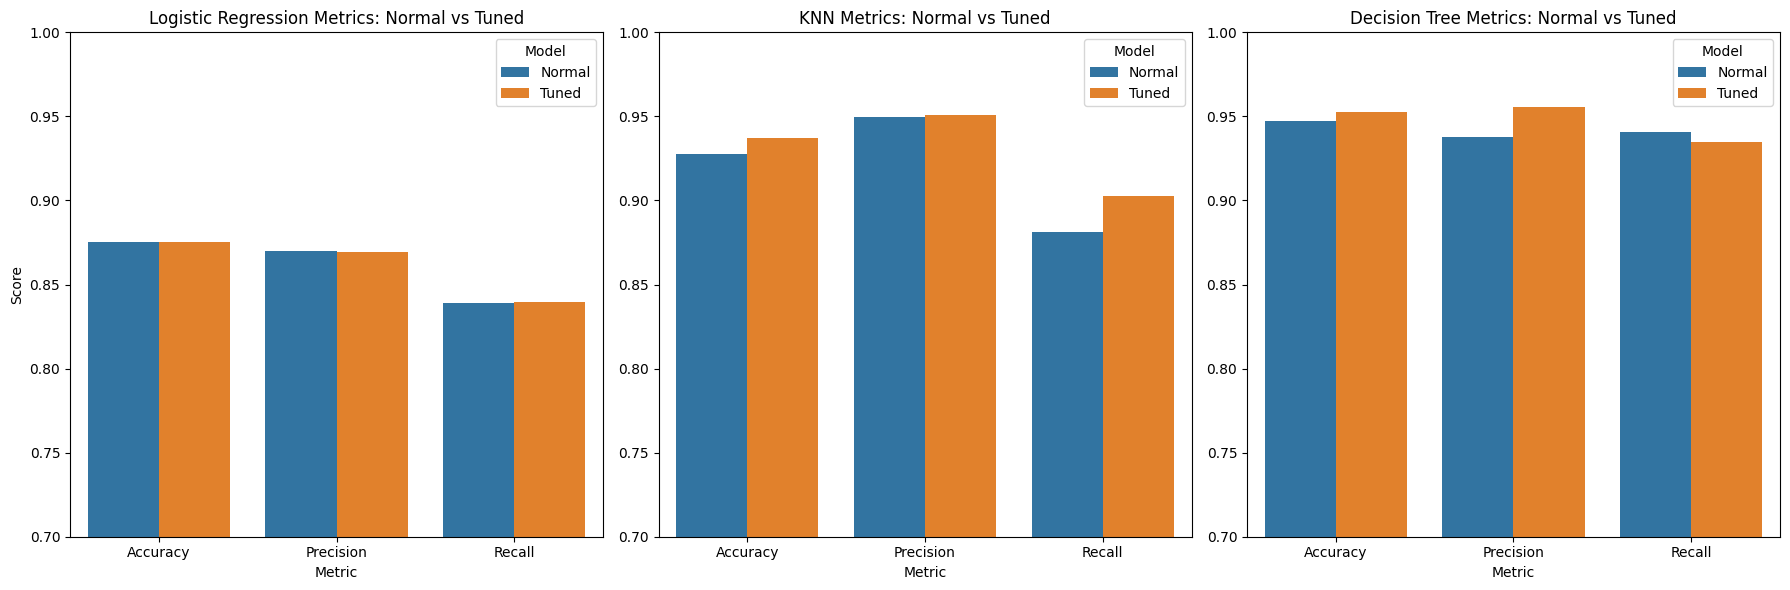

In [211]:
# Data for the three models
data_logistic = {
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Normal': [accuracy_log, precision_log, recall_log],
    'Tuned': [accuracy_log_tuned, precision_log_tuned, recall_log_tuned]
}
data_knn = {
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Normal': [accuracy_knn, precision_knn, recall_knn],
    'Tuned': [accuracy_knn_tuned, precision_knn_tuned, recall_knn_tuned]
}
data_tree = {
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Normal': [accuracy_tree, precision_tree, recall_tree],
    'Tuned': [accuracy_tree_tuned, precision_tree_tuned, recall_tree_tuned]
}

# Creating DataFrames and melting them
df_logistic = pd.DataFrame(data_logistic).melt(id_vars='Metric', var_name='Model', value_name='Score')
df_knn = pd.DataFrame(data_knn).melt(id_vars='Metric', var_name='Model', value_name='Score')
df_tree = pd.DataFrame(data_tree).melt(id_vars='Metric', var_name='Model', value_name='Score')

# Setting up the matplotlib figure with 3 subplots
plt.figure(figsize=(18, 6))

# Logistic Regression plot
plt.subplot(1, 3, 1)
sns.barplot(data=df_logistic, x='Metric', y='Score', hue='Model')
plt.title('Logistic Regression Metrics: Normal vs Tuned')
plt.ylim(0.70, 1.00)

# KNN plot
plt.subplot(1, 3, 2)
sns.barplot(data=df_knn, x='Metric', y='Score', hue='Model')
plt.title('KNN Metrics: Normal vs Tuned')
plt.ylim(0.70, 1.00)
plt.ylabel('')  # Hide y-label to avoid repetition

# Decision Tree plot
plt.subplot(1, 3, 3)
sns.barplot(data=df_tree, x='Metric', y='Score', hue='Model')
plt.title('Decision Tree Metrics: Normal vs Tuned')
plt.ylim(0.70, 1.00)
plt.ylabel('')  # Hide y-label to avoid repetition

# Adjust layout
plt.tight_layout()

plt.show()


### *Plotting the time complexity of the models*
The below barchart illustrates the time complexities in seconds associated with each model; as expected untuned models generally have lower training times compared to their untuned version; indedd, the tuning process significantly increases training times, with KNN tuned being the most computationally expensive among the provided models, while its untuned version was the fastest. However, for every model we obtained reasonable training times, even if the tuning process was 'particularly' expensive for the KNN model (but still resonable). 

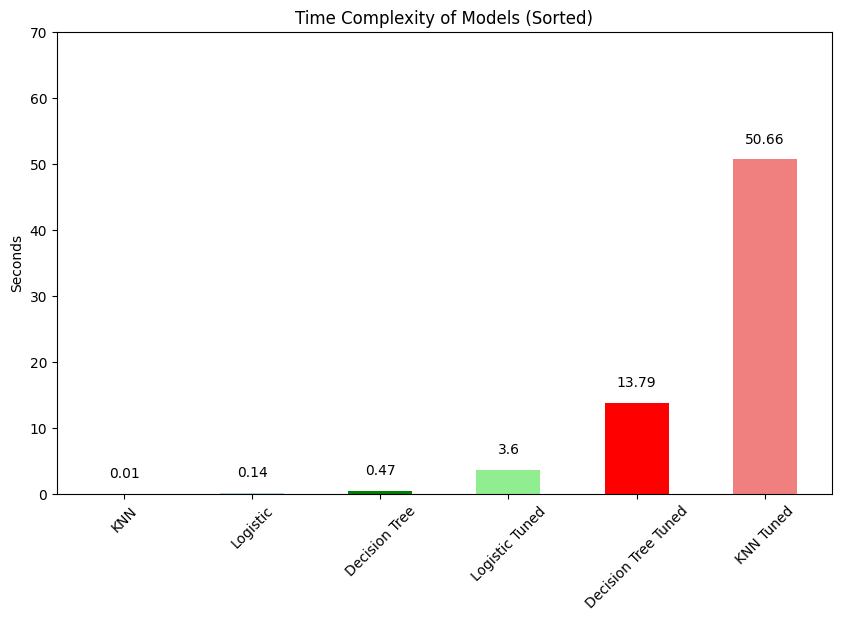

In [212]:
import matplotlib.pyplot as plt

# Data
d = {'Logistic': time_log, 'Logistic Tuned': time_log_tuned, 
     'KNN': time_knn, 'KNN Tuned': time_knn_tuned, 
     'Decision Tree': time_tree, 'Decision Tree Tuned': time_tree_tuned}

# Sorting the dictionary by values in ascending order
sorted_d = dict(sorted(d.items(), key=lambda item: item[1]))

# Colors for distinction
colors = ['blue', 'lightblue', 'green', 'lightgreen', 'red', 'lightcoral']

plt.figure(figsize=(10, 6))  # Larger figure size for better visibility

# Creating the bar chart
bars = plt.bar(sorted_d.keys(), sorted_d.values(), color=colors, width=0.5)

# Setting y-axis limits
max_y_lim = 70
min_y_lim = 0
plt.ylim(min_y_lim, max_y_lim)

# Adding labels for readability
plt.ylabel('Seconds')
plt.title("Time Complexity of Models (Sorted)")

# Adding value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), 
             ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

